Environ 3 minutes pour le rennuer entièrement

idée : la fréquence des mots semble bien cacher les mots plus fins. Les études à la main on révelées d'autres mots

# 0. Import des constantes et de la base

In [1]:
#Import des packages
%matplotlib inline
import time 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
import marshal
import io
import ast
import time 

#Tokenization 
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TweetTokenizer
from functools import reduce
from operator import add
import collections
from collections import Counter

#Word2Vec
from gensim.models import Word2Vec
from multiprocessing import cpu_count

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

# Modèles de classifications
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import XGBClassifier

#BERT
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

#Clustering 
from sklearn.cluster import KMeans

#nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

# Keras 
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


#LDA
import gensim
import nltk
import time
from nltk.corpus import wordnet
import warnings
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#SentiWordNet
from nltk.corpus import wordnet
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer
nltk.download('sentiwordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/salimyoussfi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/salimyoussfi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salimyoussfi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/salimyoussfi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/salimyoussfi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/salimyoussfi/nltk_data...
[nltk_data]   Package sentiwordnet

True

In [4]:
# Import de la base intiale 

f = open('tweet_global_warming.txt', 'r',newline='', encoding='ISO-8859-1')
content = f.read().split('\r')

content_new=[]
for x in content : 
    if len(x)>0:
        content_new.append(x)

content_new=content_new[1:len(content_new)]

##########################################################################################
##########################################################################################

# Création du dataframe

col_tweet=[]
col_existence=[]
col_score=[]

#Split tweet , Note

for line in content_new:
    if len(line.split('[link]'))==2:
        (x,y)=line.split('[link]')
        col_tweet.append(x)
        col_existence.append(y)
    else : 
        if len(line.split(',Yes,'))==2:
            col_tweet.append(line.split(',Yes,')[0])
            col_existence.append(',Yes,'+line.split(',Yes,')[1])
        elif len(line.split(',No,'))==2:
            col_tweet.append(line.split(',No,')[0])
            col_existence.append(',No,'+line.split(',No,')[1])
        elif len(line.split(',Y,'))==2:
            col_tweet.append(line.split(',Y,')[0])
            col_existence.append(',Yes,'+line.split(',Y,')[1])
        elif len(line.split(',N/A,'))==2:
            col_tweet.append(line.split(',N/A,')[0])
            col_existence.append(',N/A,'+line.split(',N/A,')[1])
        elif len(line.split(',NA,'))==2:
            col_tweet.append(line.split(',NA,')[0])
            col_existence.append(',NA,'+line.split(',NA,')[1])
        elif len(line.split(',N,'))==2:
            col_tweet.append(line.split(',N,')[0])
            col_existence.append(',No,'+line.split(',N,')[1])

col_tweet.append('I truly  Fat ASS Gore should get the Scam Artist Award of the decade with his Global Warming and Energy Credits worth close to Billion')
col_existence.append(' ,NA')
col_tweet.append('Despite Climategate, LEFT investing heavily in global warming hysteria as new way 2 impose nat\'l & international controls on human freedom.')
col_existence.append(' ,NA')
        
# Split Existence/Note
col_existence_new=[]

for x in col_existence:
    if len(x.split(','))==3:
        col_existence_new.append(x.split(',')[1])
        col_score.append(x.split(',')[2])
    else:
        col_existence_new.append('NA')
        col_score.append('NA')
        
#Nettoyage existence
for avis in range(len(col_existence_new)):
    if col_existence_new[avis]=='NA' or col_existence_new[avis]=='N/A' or col_existence_new[avis]=='':
        col_existence_new[avis]=np.nan
        
#Nettoyage score
for score in range(len(col_score)):
    if 'NA' not in col_score[score]:
        col_score[score]=col_score[score].split('\t')[0]
        if len(col_score[score].split('"'))>1:
            col_score[score]=float(col_score[score].split('"')[0])
        else: 
            col_score[score]=float(col_score[score])
            
    else : 
        col_score[score]=np.nan

#Creation du DataFrame
dic={'Tweet':col_tweet,'Existence':col_existence_new,'Score':col_score}
df=pd.DataFrame(dic)

df.drop_duplicates(['Tweet'], inplace=True)
df.reset_index(inplace=True,drop=True)

In [10]:
#df.to_csv('my_file.csv.gz', compression='gzip')
df = pd.read_csv('my_file.csv.gz', compression='gzip',index_col=0)

In [9]:
dic_representations_init=['tfidf','word2vec','fast2vec_cluster','fast2vec_mean', 'bert'] 
for name_representation in dic_representations_init:
    df = pd.read_csv('representations/df_{}.csv'.format(name_representation),index_col=0)
    display(df)
    df.to_csv('representations/{}.csv.gz'.format(name_representation), compression='gzip')
    df = pd.read_csv('representations/{}.csv.gz'.format(name_representation), compression='gzip',index_col=0)
    display(df)
    print('#'*20)
    print('#'*20)

,0,1,2,3,4,5,6,7,8,9,...,7182,7183,7184,7185,7186,7187,7188,7189,7190,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
5536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
5537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


,0,1,2,3,4,5,6,7,8,9,...,7182,7183,7184,7185,7186,7187,7188,7189,7190,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
5536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
5537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


####################
####################


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Labels
0,-0.034803,0.574692,-0.024320,0.084124,-0.007769,-0.043919,-0.212503,-0.187975,0.194824,-0.071464,...,-0.061573,0.291551,-0.099408,-0.417668,0.114716,-0.070984,-0.140349,0.155909,0.387361,Yes
1,-0.045523,0.679620,0.000538,0.103425,-0.005931,-0.023181,-0.233011,-0.246731,0.277161,-0.078278,...,-0.031663,0.376862,-0.074846,-0.527581,0.142178,-0.079401,-0.190756,0.178426,0.480519,Yes
2,-0.099174,0.598018,0.147960,-0.048949,-0.031430,-0.017491,-0.149470,-0.287509,0.368354,-0.136673,...,-0.079986,0.281047,-0.051203,-0.427393,0.209120,0.037495,-0.045074,0.212375,0.501800,Yes
3,-0.032602,0.584073,-0.000475,0.022584,-0.020850,-0.066859,-0.207133,-0.080091,0.247074,-0.082756,...,-0.103604,0.323825,-0.140997,-0.380847,0.117071,-0.048625,-0.109754,0.159889,0.402783,Yes
4,-0.122250,0.553165,0.123425,-0.024946,0.018299,0.033656,-0.132178,-0.334184,0.323884,-0.127449,...,-0.058247,0.233620,0.048888,-0.392988,0.176985,0.028446,-0.054034,0.191555,0.447745,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,-0.061722,0.611638,0.056657,0.056770,0.013780,0.001569,-0.173358,-0.267492,0.287655,-0.122263,...,-0.046790,0.328453,-0.031375,-0.454243,0.158813,-0.017741,-0.159698,0.198078,0.473690,NaN
5533,-0.113981,0.498588,0.163165,-0.056748,-0.018788,0.026716,-0.103223,-0.277220,0.336499,-0.118409,...,-0.064640,0.227641,0.007247,-0.337773,0.185337,0.024355,-0.009709,0.181260,0.392719,No
5534,-0.077606,0.424907,0.097420,0.010471,0.008839,0.024059,-0.111279,-0.266572,0.203657,-0.083056,...,-0.058557,0.180753,-0.014085,-0.332193,0.134709,-0.016538,-0.027659,0.144992,0.326755,No
5535,-0.077740,0.501264,0.064616,0.010643,0.010023,0.000034,-0.142786,-0.241226,0.250688,-0.096883,...,-0.068197,0.217512,-0.031275,-0.362096,0.145170,-0.016336,-0.054055,0.157962,0.390158,No


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Labels
0,-0.034803,0.574692,-0.024320,0.084124,-0.007769,-0.043919,-0.212503,-0.187975,0.194824,-0.071464,...,-0.061573,0.291551,-0.099408,-0.417668,0.114716,-0.070984,-0.140349,0.155909,0.387361,Yes
1,-0.045523,0.679620,0.000538,0.103425,-0.005931,-0.023181,-0.233011,-0.246731,0.277161,-0.078278,...,-0.031663,0.376862,-0.074846,-0.527581,0.142178,-0.079401,-0.190756,0.178426,0.480519,Yes
2,-0.099174,0.598018,0.147960,-0.048949,-0.031430,-0.017491,-0.149470,-0.287509,0.368354,-0.136673,...,-0.079986,0.281047,-0.051203,-0.427393,0.209120,0.037495,-0.045074,0.212375,0.501800,Yes
3,-0.032602,0.584073,-0.000475,0.022584,-0.020850,-0.066859,-0.207133,-0.080091,0.247074,-0.082756,...,-0.103604,0.323825,-0.140997,-0.380847,0.117071,-0.048625,-0.109754,0.159889,0.402783,Yes
4,-0.122250,0.553165,0.123425,-0.024946,0.018299,0.033656,-0.132178,-0.334184,0.323884,-0.127449,...,-0.058247,0.233620,0.048888,-0.392988,0.176985,0.028446,-0.054034,0.191555,0.447745,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,-0.061722,0.611638,0.056657,0.056770,0.013780,0.001569,-0.173358,-0.267492,0.287655,-0.122263,...,-0.046790,0.328453,-0.031375,-0.454243,0.158813,-0.017741,-0.159698,0.198078,0.473690,NaN
5533,-0.113981,0.498588,0.163165,-0.056748,-0.018788,0.026716,-0.103223,-0.277220,0.336499,-0.118409,...,-0.064640,0.227641,0.007247,-0.337773,0.185337,0.024355,-0.009709,0.181260,0.392719,No
5534,-0.077606,0.424907,0.097420,0.010471,0.008839,0.024059,-0.111279,-0.266572,0.203657,-0.083056,...,-0.058557,0.180753,-0.014085,-0.332193,0.134709,-0.016538,-0.027659,0.144992,0.326755,No
5535,-0.077740,0.501264,0.064616,0.010643,0.010023,0.000034,-0.142786,-0.241226,0.250688,-0.096883,...,-0.068197,0.217512,-0.031275,-0.362096,0.145170,-0.016336,-0.054055,0.157962,0.390158,No


####################
####################


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Labels
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
5536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
5537,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Labels
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
5536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
5537,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No


####################
####################


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,0.023414,0.005850,-0.041093,-0.032021,0.004571,0.005043,0.039657,0.020650,0.031514,-0.048857,...,-0.033821,-0.002979,-0.011879,-0.015871,-0.042950,0.002714,0.093157,0.018993,-0.028171,Yes
1,0.021233,0.064300,-0.068433,0.039700,0.008767,0.032167,0.017867,0.007667,0.114133,0.016667,...,-0.038667,0.038833,-0.007900,0.012667,0.049933,-0.054100,0.070800,0.014133,-0.050967,Yes
2,-0.047160,0.005480,0.012520,-0.022360,-0.002520,-0.084140,-0.029600,-0.017000,0.055100,-0.033980,...,-0.003260,-0.014620,0.018440,-0.022480,0.009400,-0.023080,0.209880,0.079020,0.044420,Yes
3,-0.004100,0.014900,-0.017750,0.000950,-0.040650,-0.120650,-0.033950,0.036200,-0.010050,-0.011100,...,-0.007550,-0.043650,0.019400,-0.031350,-0.021100,-0.049050,0.225300,0.009250,-0.010300,Yes
4,0.052200,0.022450,-0.183250,0.029650,-0.077250,-0.056450,-0.046750,-0.042300,0.083000,-0.031850,...,0.003200,-0.058650,0.013300,-0.014750,-0.095300,-0.062300,0.187300,-0.010800,0.036300,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0.012700,0.068600,0.007980,0.049280,-0.011000,0.042040,0.105280,-0.005640,0.039080,-0.023800,...,-0.099220,0.037980,0.084960,-0.065920,0.066540,-0.000320,0.015800,0.041500,-0.024940,NaN
5535,-0.096400,-0.005040,-0.030640,-0.004840,0.003840,-0.017080,0.009400,-0.070480,0.013000,0.011100,...,-0.085400,0.056460,0.015820,-0.029300,-0.073400,-0.051820,0.199580,-0.021740,-0.001900,No
5536,0.013713,-0.016407,-0.069427,-0.011700,0.005907,0.010667,0.012180,0.028887,-0.005393,0.038313,...,0.043380,-0.026667,0.035780,-0.004920,-0.018840,-0.004713,0.126353,0.048653,-0.038813,No
5537,-0.007162,0.026894,-0.014887,0.013413,0.022212,-0.037306,0.027094,-0.007219,0.005625,0.003894,...,-0.029994,-0.009288,0.019863,0.012325,0.002912,0.004813,0.145725,0.043256,-0.017325,No


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,0.023414,0.005850,-0.041093,-0.032021,0.004571,0.005043,0.039657,0.020650,0.031514,-0.048857,...,-0.033821,-0.002979,-0.011879,-0.015871,-0.042950,0.002714,0.093157,0.018993,-0.028171,Yes
1,0.021233,0.064300,-0.068433,0.039700,0.008767,0.032167,0.017867,0.007667,0.114133,0.016667,...,-0.038667,0.038833,-0.007900,0.012667,0.049933,-0.054100,0.070800,0.014133,-0.050967,Yes
2,-0.047160,0.005480,0.012520,-0.022360,-0.002520,-0.084140,-0.029600,-0.017000,0.055100,-0.033980,...,-0.003260,-0.014620,0.018440,-0.022480,0.009400,-0.023080,0.209880,0.079020,0.044420,Yes
3,-0.004100,0.014900,-0.017750,0.000950,-0.040650,-0.120650,-0.033950,0.036200,-0.010050,-0.011100,...,-0.007550,-0.043650,0.019400,-0.031350,-0.021100,-0.049050,0.225300,0.009250,-0.010300,Yes
4,0.052200,0.022450,-0.183250,0.029650,-0.077250,-0.056450,-0.046750,-0.042300,0.083000,-0.031850,...,0.003200,-0.058650,0.013300,-0.014750,-0.095300,-0.062300,0.187300,-0.010800,0.036300,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0.012700,0.068600,0.007980,0.049280,-0.011000,0.042040,0.105280,-0.005640,0.039080,-0.023800,...,-0.099220,0.037980,0.084960,-0.065920,0.066540,-0.000320,0.015800,0.041500,-0.024940,NaN
5535,-0.096400,-0.005040,-0.030640,-0.004840,0.003840,-0.017080,0.009400,-0.070480,0.013000,0.011100,...,-0.085400,0.056460,0.015820,-0.029300,-0.073400,-0.051820,0.199580,-0.021740,-0.001900,No
5536,0.013713,-0.016407,-0.069427,-0.011700,0.005907,0.010667,0.012180,0.028887,-0.005393,0.038313,...,0.043380,-0.026667,0.035780,-0.004920,-0.018840,-0.004713,0.126353,0.048653,-0.038813,No
5537,-0.007162,0.026894,-0.014887,0.013413,0.022212,-0.037306,0.027094,-0.007219,0.005625,0.003894,...,-0.029994,-0.009288,0.019863,0.012325,0.002912,0.004813,0.145725,0.043256,-0.017325,No


####################
####################


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Labels
0,-0.194920,-0.112881,0.388437,-0.109874,0.041914,-0.137204,0.109907,0.556634,-0.304503,-0.419192,...,-0.042977,-0.004823,-0.049975,0.218379,-0.276184,0.220082,-0.796053,0.144477,-0.509098,Yes
1,-0.174782,-0.099447,-0.468011,0.108068,-0.028635,-0.427431,0.169761,0.651794,-0.305934,-0.692678,...,-0.023003,-0.002153,-0.354740,0.397673,-0.244706,0.033439,-0.483247,-0.173934,-0.337515,Yes
2,0.039530,-0.073837,-0.087995,0.360194,0.181992,-0.366591,0.008656,0.453784,-0.260378,-0.490275,...,0.075246,0.057701,-0.087006,0.320335,-0.269148,0.119730,-0.637774,0.000480,-0.097225,Yes
3,-0.264160,-0.126185,-0.099923,0.301749,0.262108,-0.213265,0.108956,0.407808,-0.187299,-0.148701,...,-0.155414,-0.248788,-0.342570,0.218711,-0.174955,-0.092277,-0.557828,-0.256308,-0.358489,Yes
4,0.078526,0.177795,0.488374,0.213472,0.312748,-0.280140,0.397646,0.429720,-0.310175,-0.554000,...,-0.093388,-0.008426,0.207753,0.094225,-0.148403,0.101668,-0.530785,0.069791,-0.241589,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,-0.400154,-0.256461,-0.183564,0.033262,0.159400,-0.255320,0.377321,0.061936,-0.094525,-0.187200,...,0.181568,0.113463,-0.217428,-0.007062,-0.436011,-0.095360,-0.296756,0.257059,-0.234672,NaN
5535,0.051658,-0.054771,0.298856,0.032705,0.214817,-0.419218,-0.005545,0.701181,-0.368737,-0.288521,...,0.209300,-0.141448,-0.260576,0.385859,-0.042413,-0.044953,-0.381793,0.155324,-0.293402,No
5536,-0.120506,0.175940,0.014781,-0.156842,0.175269,0.039736,0.083392,0.751514,0.105191,-0.167486,...,-0.151757,-0.134946,-0.152878,-0.033997,-0.350957,-0.388650,-0.116329,0.089427,-0.230295,No
5537,0.073636,0.110835,0.429038,0.118876,0.007961,-0.031842,-0.030791,0.188152,-0.325286,-0.172276,...,0.337875,-0.096466,-0.481865,0.066156,-0.208680,0.082813,-0.188787,0.365409,0.169572,No


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Labels
0,-0.194920,-0.112881,0.388437,-0.109874,0.041914,-0.137204,0.109907,0.556634,-0.304503,-0.419192,...,-0.042977,-0.004823,-0.049975,0.218379,-0.276184,0.220082,-0.796053,0.144477,-0.509098,Yes
1,-0.174782,-0.099447,-0.468011,0.108068,-0.028635,-0.427431,0.169761,0.651794,-0.305934,-0.692678,...,-0.023003,-0.002153,-0.354740,0.397673,-0.244706,0.033439,-0.483247,-0.173934,-0.337515,Yes
2,0.039530,-0.073837,-0.087995,0.360194,0.181992,-0.366591,0.008656,0.453784,-0.260378,-0.490275,...,0.075246,0.057701,-0.087006,0.320335,-0.269148,0.119730,-0.637774,0.000480,-0.097225,Yes
3,-0.264160,-0.126185,-0.099923,0.301749,0.262108,-0.213265,0.108956,0.407808,-0.187299,-0.148701,...,-0.155414,-0.248788,-0.342570,0.218711,-0.174955,-0.092277,-0.557828,-0.256308,-0.358489,Yes
4,0.078526,0.177795,0.488374,0.213472,0.312748,-0.280140,0.397646,0.429720,-0.310175,-0.554000,...,-0.093388,-0.008426,0.207753,0.094225,-0.148403,0.101668,-0.530785,0.069791,-0.241589,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,-0.400154,-0.256461,-0.183564,0.033262,0.159400,-0.255320,0.377321,0.061936,-0.094525,-0.187200,...,0.181568,0.113463,-0.217428,-0.007062,-0.436011,-0.095360,-0.296756,0.257059,-0.234672,NaN
5535,0.051658,-0.054771,0.298856,0.032705,0.214817,-0.419218,-0.005545,0.701181,-0.368737,-0.288521,...,0.209300,-0.141448,-0.260576,0.385859,-0.042413,-0.044953,-0.381793,0.155324,-0.293402,No
5536,-0.120506,0.175940,0.014781,-0.156842,0.175269,0.039736,0.083392,0.751514,0.105191,-0.167486,...,-0.151757,-0.134946,-0.152878,-0.033997,-0.350957,-0.388650,-0.116329,0.089427,-0.230295,No
5537,0.073636,0.110835,0.429038,0.118876,0.007961,-0.031842,-0.030791,0.188152,-0.325286,-0.172276,...,0.337875,-0.096466,-0.481865,0.066156,-0.208680,0.082813,-0.188787,0.365409,0.169572,No


####################
####################


Quelques exemples de tweets : 

In [3]:
# Exemples de tweets

print('Exemples de tweets qui croient au réchauffement climatique : ')
print(' ')
for k in range(5):
    print(df[df.Existence=='Yes'].reset_index().iloc[k]['Tweet'])
    print(' ')
    
print('#'*50)
print('#'*50)
print(' ')
print('Exemples de tweets qui doutent du réchauffement climatique : ')
print(' ')
for k in range(5):
    print(df[df.Existence=='No'].reset_index().iloc[k]['Tweet'])
    print(' ')

Exemples de tweets qui croient au réchauffement climatique : 
 
Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. 
 
Fighting poverty and global warming in Africa 
 
Carbon offsets: How a Vatican forest failed to reduce global warming 
 
URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change 
 
RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle 
 
##################################################
##################################################
 
Exemples de tweets qui doutent du réchauffement climatique : 
 
Wait here's an idea: it's natural climate change, not human induced global warming. 
 
@New_federalists  i have it on good auth tht global warming also causes toe fungus.  We R all fortunate tht thr IS no global warming! #tcot
 
Illegal war and the myth of global warming|My main campaign platform for this election will be the illegal .. 
 
the scientific com

 Une petite description de la base : 

In [4]:
print('On dispose de {} tweets.'.format(df.shape[0]))
print(' ')
print('On a {} données manquantes sur le label de l\'avis du tweet (Yes, No) .'.format(str(df.isnull().sum()['Existence'])))
print(' ')
print('On a {} tweets qui croit au Changement climatique.'.format(str(df[df.Existence=='Yes'].shape[0])))
print('On a {} tweets qui remettent en doute le Changement climatique.'.format(str(df[df.Existence=='No'].shape[0])))



On dispose de 5539 tweets.
 
On a 1683 données manquantes sur le label de l'avis du tweet (Yes, No) .
 
On a 2821 tweets qui croit au Changement climatique.
On a 1035 tweets qui remettent en doute le Changement climatique.


# I. Nettoyage des données et représentations des tweets

### Tokenization des tweets et nettoyage des tokens 

In [5]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_return = {"j": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return tag_return.get(tag, wordnet.NOUN)

#On prend toutes les phrases de touts les texts, et on les concatène dans une liste, en les traitant auparavant

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def remove_hashtags(tokens):
    tokens= map(lambda x : x.replace('#',''),tokens) #map : parcours tout les tokens
    return list(tokens)

def remove_url(tokens): #pb pour https
    tokens= filter(lambda x: "http" not in x, tokens) #filter : garde là où il y a True
    return list(tokens)

def remove_html(tokens):
    tokens= filter(lambda x: x[0]+x[-1]!='<>',tokens)
    return list(tokens)

def remove_www(tokens):
    tokens= filter(lambda x: "www" not in x, tokens) #filter : garde là où il y a True
    return list(tokens)

def remove_contraction(sample):
    sample = sample.lower()
    sample = sample.replace('won\'t', ' will not')    
    sample = sample.replace('n\'t',' not')
    sample = sample.replace('\'ll',' will') 
    sample = sample.replace('it\'s','it is')    
    sample = sample.replace('he\'s','he is')    
    sample = sample.replace('she\'s','she is')    
    sample = sample.replace('\'re', ' are')
    sample = sample.replace('that\'s', 'that is')
    return sample


def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def clean_ponctuation(text_tokens): # Nettoyage de la ponctuation

    list_word_clean_ponctuation=[]
    for tweet in text_tokens:
        list_tweet=[]
        for word in tweet:
            if len(word)<2:
                if (word=='a') or (word=='i') or (word=='u'):
                    list_tweet.append(word)
                if RepresentsInt(word):
                    list_tweet.append(word)
            else :
                if (word!='..') & (word!='...') & (word!='rt'):
                    list_tweet.append(word)
        list_word_clean_ponctuation.append(list_tweet)
    
    return(list_word_clean_ponctuation)

def remove_arobase(text_tokens):
    
    list_new_tokens=[]
    for tweet in text_tokens:
        new_tweet=[]
        for word in tweet: 
            if '@' not in word:
                new_tweet.append(word)
        list_new_tokens.append(new_tweet)
    
    return(list_new_tokens)

###############################################################
###############################################################
###############################################################

def clean_text_first(corpus):
    
    tok=TweetTokenizer()
    tokens=[]
    for sample in corpus:
        sample = remove_contraction(sample)
        token=tok.tokenize(sample)
        token=remove_url(token)
        token=remove_html(token)
        token=remove_hashtags(token)
        token=remove_www(token)
        token2 = []
        for elt in token:
            if elt != '':
                if elt != "warming":
                    token2.append(lemmatizer.lemmatize(elt, get_wordnet_pos(elt)))
                else:
                    token2.append("warming")
        token=list(map(lambda x : x.lower(),token2)) #.lower() : met les majuscules en minuscules
        tokens.append(token) #ajout du token à l'ensemble des phrases
    
    #Nettoyage de la ponctuation
    tokens=clean_ponctuation(tokens)
    
    #Nettoyage des arobase : pour la plupart, se sont des noms propres
    tokens=remove_arobase(tokens)
    
    return tokens

def clean_text_second(corpus,threshold=10, stopwords_out = False): #On rajoute l'association des mots qui vont ensembles
    
    #clean les textes
    tokens=clean_text_first(corpus)
    
    #associer les mots
    phrases=Phrases(tokens,threshold=threshold) #On fait apprendre le modèle d'association sur tout les mots
    phraser=Phraser(phrases) #Outil pour associer
    
    clean_tokens=[]
    for token in tokens: #On parcours les phrases et on associe les mots
        new_tokens=phraser[token]
        if stopwords_out :
            new_tokens2 = []
            for elt in new_tokens:
                if elt not in stopWords:
                    new_tokens2.append(elt)
            clean_tokens.append(new_tokens2)
        else:
            clean_tokens.append(new_tokens)
    
    return(clean_tokens)

"""
# Sauvegarde des tokens nettoyés
clean_text=clean_text_second(df.Tweet)
data=pd.DataFrame([clean_text]).T
data.to_csv('clean_text.csv')

df_yes=df[df.Existence=='Yes'].reset_index()
clean_text_yes=clean_text_second(df_yes.Tweet)
data=pd.DataFrame([clean_text_yes]).T
data.to_csv('clean_text_yes.csv')

df_no=df[df.Existence=='No'].reset_index()
clean_text_no=clean_text_second(df_no.Tweet)
data=pd.DataFrame([clean_text_no]).T
data.to_csv('clean_text_no.csv')
"""




# Fonction pour l'importée
def import_clean_text(option='all'):

    if option=='all':
        clean_new=[]
        clean_text=pd.read_csv('clean_text.csv',index_col=0)
        for tweet in list(clean_text['0']):
            clean_new.append(ast.literal_eval(tweet))
        clean_text=clean_new

    if option=='yes':
        clean_new=[]
        clean_text=pd.read_csv('clean_text_yes.csv',index_col=0)
        for tweet in list(clean_text['0']):
            clean_new.append(ast.literal_eval(tweet))
        clean_text=clean_new
        
    if option=='no':
        clean_new=[]
        clean_text=pd.read_csv('clean_text_no.csv',index_col=0)
        for tweet in list(clean_text['0']):
            clean_new.append(ast.literal_eval(tweet))
        clean_text=clean_new
    
    return(clean_text)



Mots les plus fréquents après le nettoyage des tweets : 

In [6]:
#Mots les plus fréquents après nettoyage des tokens

list_words=import_clean_text()

counter=collections.Counter(reduce(add, list_words))

#10 mots les plus fréquents 
number_word=10
print('Les {} mots qui apparaissent le plus sont (par ordre décroissant) :'.format(number_word))
print(' ')
for word in counter.most_common(number_word):
    print(word[0]+' ('+str(word[1])+') ') 

Les 10 mots qui apparaissent le plus sont (par ordre décroissant) :
 
climate_change (2936) 
global_warming (2709) 
the (2275) 
be (1801) 
to (1443) 
of (1328) 
a (1193) 
on (962) 
and (869) 
in (845) 


In [7]:
# Taille moyenne des tweet : 
list_words
mean=0
for tweet in list_words:
    mean=mean+len(tweet)
    
print('En moyenne, on a retenu {} mots par tweet '.format(str(round(mean/len(list_words),0))))

En moyenne, on a retenu 12.0 mots par tweet 


### Représentation TF-IDF

 Pour chaque mot, on a un vecteur le représentant. Pour réprésenter un tweet, on fait la moyenne des vecteurs correspondant à chacun de ces mots.

In [8]:
# Initialisation des mots TF-IDF
cv = CountVectorizer()
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)

# Formatage de la base pour la méthode TF-IDF
corpus=clean_text_second(df.Tweet,threshold=20, stopwords_out = True)
corpus_new=[]
for tweet in corpus: 
    tweet_sentence=''
    for word in tweet:
        tweet_sentence=tweet_sentence+' '+word
    corpus_new.append(tweet_sentence)
    
# Caclul des scores TF-IDF de chaque mot
word_count_vector=cv.fit_transform(corpus_new)
tfidf_transformer.fit(word_count_vector)

count_vector=cv.transform(corpus_new)
tf_idf_vector=tfidf_transformer.transform(count_vector)
feature_names = cv.get_feature_names()


In [9]:
# Exemple de représentation du premier tweet 

#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]

#print du tweet
print(' ')
print('Tweet initial : '+df.iloc[0]['Tweet'])
print(' ')

#print du tweet nettoyé
print('Tweet nettoyé : '+corpus_new[0])
print(' ')
print('Scores TF-IDF : ')
#print des scores 
pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["first_tweet"]).sort_values(by=["first_tweet"],ascending=False)

 
Tweet initial : Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. 
 
Tweet nettoyé :  global warming report urge government act brussels belgium ap world face increase hunger
 
Scores TF-IDF : 


,first_tweet
belgium,0.382666
brussels,0.382666
hunger,0.359726
urge,0.320411
face,0.287450
...,...
exclusive,0.000000
excite,0.000000
exchange,0.000000
excess,0.000000


In [10]:
# Représentation de tout les tweets 

"""
df_tfidf = pd.DataFrame(tf_idf_vector.T.todense(),index=feature_names)
df_tfidf=df_tfidf.T
df_tfidf.columns=[x for x in range(df_tfidf.shape[1])]
df_tfidf['Labels']=df.Existence
df_tfidf.to_csv('representations/df_tfidf.csv')
df_tfidf
"""

"\ndf_tfidf = pd.DataFrame(tf_idf_vector.T.todense(),index=feature_names)\ndf_tfidf=df_tfidf.T\ndf_tfidf.columns=[x for x in range(df_tfidf.shape[1])]\ndf_tfidf['Labels']=df.Existence\ndf_tfidf.to_csv('representations/df_tfidf.csv')\ndf_tfidf\n"

In [11]:
df_tfidf=pd.read_csv('representations/df_tfidf.csv',index_col=0)
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,7182,7183,7184,7185,7186,7187,7188,7189,7190,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
5536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
5537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


### Représentation Word2Vec entrainé sur la base

On utilise tout d'abord l'algorithme Word2Vec pour représenter ces tweets. Chaque mot à une représentation vectorielle. Pour chaque tweet, on fait la moyenne des vecteurs (chaque mot) inclut dans ce tweet.

In [12]:
#Cleaning des tweets
clean_text=import_clean_text()

print("Entrainement du modèle Word2Vec ...")
model = Word2Vec(clean_text, size=100, window=5, min_count=3, workers=4) 

model.train(clean_text, total_examples=len(clean_text), epochs=10) #réseau de neuronne du Word2Vec
model_wv = model.wv

Entrainement du modèle Word2Vec ...


In [13]:
# Représentation des tweets en moyennant les mots

def tokens2vectors(tokenCorpus):
    ''' transforms our X into a list of list of vec (2D array) '''
    new_sample = list()
    i=0
    labels=[]
    for sample in tokenCorpus:
        tweetVecs = list()
        for token in sample:
            try : 
                tweetVecs.append(model_wv.get_vector(token)  )
            except: 
                i=i+1
                tweetVecs.append( np.zeros(100) ) 
        new_sample.append(np.mean(tweetVecs, axis=0))
    
    return np.array(new_sample)


X= tokens2vectors(clean_text)

Y=[]
labels=[]
index_label=0
for x in list(X):
    try: 
        Y.append(list(x))
        labels.append(df.Existence[index_label])
        index_label=index_label+1
    except : 
        index_label=index_label+1
        pass
    
df_word2vec= pd.DataFrame(Y,columns=[str(x) for x in range(len(Y[0]))])
df_word2vec['Labels']=labels

/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
df_word2vec.to_csv('representations/df_word2vec.csv')
df_word2vec

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Labels
0,-0.034803,0.574692,-0.024320,0.084124,-0.007769,-0.043919,-0.212503,-0.187975,0.194824,-0.071464,...,-0.061573,0.291551,-0.099408,-0.417668,0.114716,-0.070984,-0.140349,0.155909,0.387361,Yes
1,-0.045523,0.679620,0.000538,0.103425,-0.005931,-0.023181,-0.233011,-0.246731,0.277161,-0.078278,...,-0.031663,0.376862,-0.074846,-0.527581,0.142178,-0.079401,-0.190756,0.178426,0.480519,Yes
2,-0.099174,0.598018,0.147960,-0.048949,-0.031430,-0.017491,-0.149470,-0.287509,0.368354,-0.136673,...,-0.079986,0.281047,-0.051203,-0.427393,0.209120,0.037495,-0.045074,0.212375,0.501800,Yes
3,-0.032602,0.584073,-0.000475,0.022584,-0.020850,-0.066859,-0.207133,-0.080091,0.247074,-0.082756,...,-0.103604,0.323825,-0.140997,-0.380847,0.117071,-0.048625,-0.109754,0.159889,0.402783,Yes
4,-0.122250,0.553165,0.123425,-0.024946,0.018299,0.033656,-0.132178,-0.334184,0.323884,-0.127449,...,-0.058247,0.233620,0.048888,-0.392988,0.176985,0.028446,-0.054034,0.191555,0.447745,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,-0.061722,0.611638,0.056657,0.056770,0.013780,0.001569,-0.173358,-0.267492,0.287655,-0.122263,...,-0.046790,0.328453,-0.031375,-0.454243,0.158813,-0.017741,-0.159698,0.198078,0.473690,NaN
5533,-0.113981,0.498588,0.163165,-0.056748,-0.018788,0.026716,-0.103223,-0.277220,0.336499,-0.118409,...,-0.064640,0.227641,0.007247,-0.337773,0.185337,0.024355,-0.009709,0.181260,0.392719,No
5534,-0.077606,0.424907,0.097420,0.010471,0.008839,0.024059,-0.111279,-0.266572,0.203657,-0.083056,...,-0.058557,0.180753,-0.014085,-0.332193,0.134709,-0.016538,-0.027659,0.144992,0.326755,No
5535,-0.077740,0.501264,0.064616,0.010643,0.010023,0.000034,-0.142786,-0.241226,0.250688,-0.096883,...,-0.068197,0.217512,-0.031275,-0.362096,0.145170,-0.016336,-0.054055,0.157962,0.390158,No


### Représentation Fast2vec pre-trained 

In [15]:
clean_text=import_clean_text()

def load_vectors(fname, amount):
    fin = io.open(fname, 'r', encoding ='utf-8', newline = '\n', errors = 'ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    i = 0
    for line in fin:
        i += 1 
        print("Done : ", i/amount * 100, "%")
        if i < amount:
            tokens = line.rstrip().split(' ')
            data[tokens[0]] = tokens[1:]
        else:
            break
    return data

In [16]:
"""
fastext = load_vectors('wiki-news-300d-1M.vec', 500000)


clean_text=clean_text_first(df.Tweet)

dic_words = {}
unknown_list = []

unknown = 0
count_word = 0

for tweet in clean_text:
    for word in tweet:
        count_word += 1
        if word in fastext.keys():
            dic_words[word] = fastext[word]
        else:
            unknown += 1
            unknown_list.append(word)

marshal.dump(dic_words, open('dic_words.dat', 'wb'))
"""

"\nfastext = load_vectors('wiki-news-300d-1M.vec', 500000)\n\n\nclean_text=clean_text_first(df.Tweet)\n\ndic_words = {}\nunknown_list = []\n\nunknown = 0\ncount_word = 0\n\nfor tweet in clean_text:\n    for word in tweet:\n        count_word += 1\n        if word in fastext.keys():\n            dic_words[word] = fastext[word]\n        else:\n            unknown += 1\n            unknown_list.append(word)\n\nmarshal.dump(dic_words, open('dic_words.dat', 'wb'))\n"

In [17]:
inf = open('dic_words.dat', 'rb')
dic_words = marshal.load(inf)

##### En clusterisant la sortie de Fast2vec

In [18]:
dataset_ft = pd.DataFrame(data=dic_words)
dataset_ft = dataset_ft.T
clustering = AgglomerativeClustering(200).fit(dataset_ft)

In [19]:
for j in range(200):
    names = []
    for k, cluster in enumerate(clustering.labels_):
        if cluster == j:
            names.append(dataset_ft.index[k])
    print("Le Cluster numéro : ", j, "contient ", len(names), " mots")
    print(" ")
    print(" ")
    print(names)
    print(" ")
    print(" ")
    print("################")
    print(" ")
    print(" ")

Le Cluster numéro :  0 contient  40  mots
 
 
['talk', 'admin', 'data', 'article', 'pic', 'environment', 'photo', 'link', 'overview', 'lede', 'user', 'cn', 'slideshow', 'ip', 'image', 'material', 'content', 'poster', 'tag', 'info', 'collage', 'page', 'bio', 'brochure', 'summary', 'nutshell', 'information', 'cleanup', 'text', 'picture', 'msg', 'section', 'enviroment', 'click', 'caption', 'blurb', 'detail', 'bios', 'photograph', 'intro']
 
 
################
 
 
Le Cluster numéro :  1 contient  52  mots
 
 
['angus', 'harry', 'ken', 'heather', 'mont', 'wor', 'dy', 'bobby', 'redd', 'abu', 'ira', 'ny', 'marc', 'dan', 'sh', 'ker', 'ted', 'turner', 'wy', 'wi', 'noel', 'doe', 'sally', 'boer', 'teamster', 'ed', 'holt', 'no1', 'drudge', 'wh', 'stan', 'ty', 'smith', 'ford', 'cud', 'batman', 'beck', 'penn', 'glen', 'twain', 'miller', 'ck', 'ing', 'lorraine', 'ned', 'mak', 'porter', 'colin', 'ling', 'bec', 'dana', 'whi']
 
 
################
 
 
Le Cluster numéro :  2 contient  32  mots
 
 
['seas

 
['henderson', 'graham', 'klein', 'rogers', 'hansen', 'cahill', 'denis', 'hayes', 'goldberg', 'barrett', 'stevens', 'milton', 'jacob', 'webb', 'sebastian', 'jones', 'clive', 'thompson', 'simpson', 'armstrong', 'mann', 'jenkins', 'kyle', 'levin', 'stein', 'benjamin', 'phillips', 'knott', 'kemp', 'joseph', 'colbert', 'walter', 'williams', 'dixon', 'goodman', 'justin', 'wv', 'ross', 'elliott', 'turnbull', 'thomas', 'malcolm', 'mccarthy', 'richardson', 'perkins', 'brennan', 'adam', 'norris', 'clarkson', 'abraham', 'lincoln', 'winston', 'churchill', 'shannon', 'arnold', 'ian', 'katz', 'locke', 'kennedy', 'floyd', 'reagan', 'margaret', 'roosevelt', 'peterson', 'katrina', 'alan', 'bryan', 'walsh', 'dylan', 'robinson', 'brandon', 'noah', 'ark', 'wayne', 'benny', 'russell', 'giles', 'coleman', 'terry', 'gardner', 'garrett', 'chavez', 'harris', 'adler', 'morton', 'charlie', 'cohen', 'weber', 'henry', 'bieber', 'roy', 'spencer', 'gregory', 'hopkins', 'alec', 'alexander', 'haiti', 'carter', 'john

Le Cluster numéro :  81 contient  13  mots
 
 
['50-50', 'award', 'roulette', 'probability', 'nobel', 'laureate', 'reward', 'odds', 'contest', 'lottery', 'competition', 'pulitzer', 'prize']
 
 
################
 
 
Le Cluster numéro :  82 contient  49  mots
 
 
['rate', 'degree', 'tip', 'level', 'average', 'estimate', 'compute', 'sheet', 'ease', 'count', 'relative', 'limit', 'pressure', 'concentration', 'momentum', 'traction', 'assortment', 'glue', 'tension', 'number', 'coverage', 'centrifugal', 'balance', 'amount', 'projection', 'camp', 'variety', 'breakdown', 'binding', 'mass', 'figure', 'counting', 'percent', 'overall', 'minimum', 'magnitude', 'imbalance', 'extent', 'weight', 'diversity', 'absolute', 'aggregate', 'sum', 'build-up', 'exposure', 'calculation', 'lock-in', 'stickiness', 'gravity']
 
 
################
 
 
Le Cluster numéro :  83 contient  28  mots
 
 
['global', 'national', 'indigenous', 'alien', 'stranger', 'foreign', 'local', 'sacred', 'international', 'small-scale', 

Le Cluster numéro :  116 contient  28  mots
 
 
['ecotone', 'clinique', 'nanofibers', 'inseparability', 'degrowth', 'mid-continent', 'geosphere', 'commercial-grade', 'guar', 'gazelle', 'freeriding', 'data-crunching', 'soy-based', 'mosquitofish', 'nyala', 'natgas', 'carbon-based', 'pika', 'co-benefits', 'redeye', 'himalayan', 'no-take', 'vegan', 'anti-allergy', 'pollack', 'gearless', 'remineralization', 'topi']
 
 
################
 
 
Le Cluster numéro :  117 contient  37  mots
 
 
['seriously', 'soon', 'publically', 'rapidly', 'effectively', 'politely', 'finally', 'responsibly', 'suavely', 'conveniently', 'gently', 'quietly', 'endlessly', 'easily', 'sensibly', 'slowly', 'boldly', 'suddenly', 'eventually', 'bold', 'unequally', 'quickly', 'wryly', 'concisely', 'sweetly', 'officially', 'formally', 'sincerely', 'inadvertently', 'incorrectly', 'purposely', 'belatedly', 'strategically', 'incessantly', 'publicly', 'innovatively', 'badly']
 
 
################
 
 
Le Cluster numéro :  118 con

Le Cluster numéro :  145 contient  15  mots
 
 
['two', 'three', 'thousand', 'eight', 'nine', 'fifty', 'six', 'twenty', 'ten', 'hundred', 'twelve', 'four', 'thirty', 'twenty-five', 'forty-nine']
 
 
################
 
 
Le Cluster numéro :  146 contient  45  mots
 
 
['news', 'book', 'magazine', 'journal', 'memo', 'press', 'release', 'newspaper', 'item', 'agenda', 'protocol', 'backgrounder', 'paper', 'editorial', 'coda', 'newswire', 'announcement', 'word', 'plank', 'headline', 'letter', 'phrase', 'term', 'version', 'charter', 'edition', 'chapter', 'draft', 'manifesto', 'roadmap', 'publication', 'roundup', 'piece', 'tidbit', 'rumor', 'theme', 'passage', 'metaphor', 'treaty', 'excerpt', 'communique', 'convention', 'primer', 'gazette', 'recommendation']
 
 
################
 
 
Le Cluster numéro :  147 contient  45  mots
 
 
['stay', 'start', 'wait', 'stop', 'settle', 'come', 'delay', 'arrive', 'go', 'curb', 'await', 'suffer', 'continue', 'dawdle', 'spur', 'keep', 'let', 'migrate', 'lie',

Le Cluster numéro :  179 contient  31  mots
 
 
['75', '86', '90', '65', '350', '100', '85', '140', '66', '70', '60', '77', '110', '82', '120', '76', '210', '406', '73', '225', '201', '124', '78', '62', '298', '80', '102', '101', '287', '141', '83']
 
 
################
 
 
Le Cluster numéro :  180 contient  8  mots
 
 
['warming', 'man-made', 'human-caused', 'human-induced', 'human-driven', 'anthropogenic', 'man-caused', 'manmade']
 
 
################
 
 
Le Cluster numéro :  181 contient  23  mots
 
 
['complicate', 'daunt', 'excite', 'simplify', 'whet', 'illuminate', 'amaze', 'confuse', 'inspire', 'empower', 'entertain', 'amuse', 'mislead', 'motivate', 'overwhelm', 'tempt', 'animate', 'scare', 'enrich', 'frighten', 'dominate', 'enlighten', 'terrify']
 
 
################
 
 
Le Cluster numéro :  182 contient  8  mots
 
 
['1.1', '2.5', '1.6', '9.1', '2.4', '3.5', '4.3', '8.8']
 
 
################
 
 
Le Cluster numéro :  183 contient  32  mots
 
 
['leader', 'negotiator', 'directo

In [20]:
vectors_ft = {}
id_tweets = {}
words_list = dataset_ft.index.tolist()



for i, tweet in enumerate(clean_text):
    vector = [0] * 200
    for word in tweet:
        if word in dic_words.keys():
            vector[clustering.labels_[words_list.index(word)]] += 1
    vectors_ft["T" + str(i)] = vector
    id_tweets["T" + str(i)] = tweet    

In [21]:
"""
df2 = df.copy()
df_rep = pd.DataFrame(vectors_ft)
df_rep = df_rep.T

existence = []
for i, elt in enumerate(df2["Existence"]):
    existence.append(elt)
df_rep.columns=[str(x) for x in range(df_rep.shape[1])]
df_rep['Labels'] = existence

df_fast2vec_cluster=df_rep.reset_index(drop=True)
df_fast2vec_cluster.to_csv('representations/df_fast2vec_cluster.csv')
"""

In [22]:
df_fast2vec_cluster=pd.read_csv('representations/df_fast2vec_cluster.csv',index_col=0)
df_fast2vec_cluster                 

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Labels
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
5536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No
5537,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,No


##### En moyennant la sortie de Fast2vec

In [23]:
"""
vectors_ft_moy = {}
id_tweets = {}


for i, tweet in enumerate(clean_text):
    vector = [0] * 300
    qtt = 0
    for word in tweet:
        if word in dic_words.keys():
            s = []
            for elt in list(dataset_ft.loc[word]):
                s.append(float(elt))
            qtt += 1
            vector = list( map(add, vector, s) )
    if qtt != 0:
        vectors_ft_moy["T" + str(i)] = [x/qtt for x in vector]
    else:
        vectors_ft_moy["T" + str(i)] = vector
    id_tweets["T" + str(i)] = tweet 
    
df_moy = pd.DataFrame(vectors_ft_moy)
df_moy = df_moy.T
df_moy.columns=[str(x) for x in range(df_moy.shape[1])]
df_moy['Labels'] = existence

df_fast2vec_mean=df_moy.reset_index(drop=True)
df_fast2vec_mean.to_csv("representations/df_fast2vec_mean.csv")
"""


'\nvectors_ft_moy = {}\nid_tweets = {}\n\n\nfor i, tweet in enumerate(clean_text):\n    vector = [0] * 300\n    qtt = 0\n    for word in tweet:\n        if word in dic_words.keys():\n            s = []\n            for elt in list(dataset_ft.loc[word]):\n                s.append(float(elt))\n            qtt += 1\n            vector = list( map(add, vector, s) )\n    if qtt != 0:\n        vectors_ft_moy["T" + str(i)] = [x/qtt for x in vector]\n    else:\n        vectors_ft_moy["T" + str(i)] = vector\n    id_tweets["T" + str(i)] = tweet \n    \ndf_moy = pd.DataFrame(vectors_ft_moy)\ndf_moy = df_moy.T\ndf_moy.columns=[str(x) for x in range(df_moy.shape[1])]\ndf_moy[\'Labels\'] = existence\n\ndf_fast2vec_mean=df_moy.reset_index(drop=True)\ndf_fast2vec_mean.to_csv("representations/df_fast2vec_mean.csv")\n'

In [24]:
df_fast2vec_mean=pd.read_csv("representations/df_fast2vec_mean.csv",index_col=0)
df_fast2vec_mean

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,0.023414,0.005850,-0.041093,-0.032021,0.004571,0.005043,0.039657,0.020650,0.031514,-0.048857,...,-0.033821,-0.002979,-0.011879,-0.015871,-0.042950,0.002714,0.093157,0.018993,-0.028171,Yes
1,0.021233,0.064300,-0.068433,0.039700,0.008767,0.032167,0.017867,0.007667,0.114133,0.016667,...,-0.038667,0.038833,-0.007900,0.012667,0.049933,-0.054100,0.070800,0.014133,-0.050967,Yes
2,-0.047160,0.005480,0.012520,-0.022360,-0.002520,-0.084140,-0.029600,-0.017000,0.055100,-0.033980,...,-0.003260,-0.014620,0.018440,-0.022480,0.009400,-0.023080,0.209880,0.079020,0.044420,Yes
3,-0.004100,0.014900,-0.017750,0.000950,-0.040650,-0.120650,-0.033950,0.036200,-0.010050,-0.011100,...,-0.007550,-0.043650,0.019400,-0.031350,-0.021100,-0.049050,0.225300,0.009250,-0.010300,Yes
4,0.052200,0.022450,-0.183250,0.029650,-0.077250,-0.056450,-0.046750,-0.042300,0.083000,-0.031850,...,0.003200,-0.058650,0.013300,-0.014750,-0.095300,-0.062300,0.187300,-0.010800,0.036300,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0.012700,0.068600,0.007980,0.049280,-0.011000,0.042040,0.105280,-0.005640,0.039080,-0.023800,...,-0.099220,0.037980,0.084960,-0.065920,0.066540,-0.000320,0.015800,0.041500,-0.024940,NaN
5535,-0.096400,-0.005040,-0.030640,-0.004840,0.003840,-0.017080,0.009400,-0.070480,0.013000,0.011100,...,-0.085400,0.056460,0.015820,-0.029300,-0.073400,-0.051820,0.199580,-0.021740,-0.001900,No
5536,0.013713,-0.016407,-0.069427,-0.011700,0.005907,0.010667,0.012180,0.028887,-0.005393,0.038313,...,0.043380,-0.026667,0.035780,-0.004920,-0.018840,-0.004713,0.126353,0.048653,-0.038813,No
5537,-0.007162,0.026894,-0.014887,0.013413,0.022212,-0.037306,0.027094,-0.007219,0.005625,0.003894,...,-0.029994,-0.009288,0.019863,0.012325,0.002912,0.004813,0.145725,0.043256,-0.017325,No


### Représentation Bert pre-trained

In [25]:
clean_text=import_clean_text()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Input formating for BERT

#tokenization spécifique BERT
def tokenization_BERT(tweet,tokenizer):
    text=''
    for word in tweet:
        text=text+' '+word
    tokenized_text='[CLS]'+text+' [SEP]'
    tokenized_text = tokenizer.tokenize(tokenized_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [0] * len(tokenized_text)
    
    return(indexed_tokens,segments_ids)

##########################################
##########################################

# Embedding du tweet
def BERT_embedding(tweet,tokenizer):
    
    #tokenization et convertion des inputs en tensors
    index, segments= tokenization_BERT(tweet,tokenizer)
    
    tokens_tensor = torch.tensor([index])
    segments_tensors = torch.tensor([segments])
    
    with torch.no_grad():
        encoded_layers, _ = model(tokens_tensor, segments_tensors)

    token_embeddings = torch.stack(encoded_layers, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    token_embeddings = token_embeddings.permute(1,0,2)
    
    token_vecs = encoded_layers[11][0]
    sentence_embedding = torch.mean(token_vecs, dim=0)
    
    return(list(sentence_embedding.numpy())) #return le vecteur du tweet
    

In [26]:
# Import du modèle
"""
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()
"""

'\n# Load pre-trained model (weights)\nmodel = BertModel.from_pretrained(\'bert-base-uncased\')\n\n# Put the model in "evaluation" mode, meaning feed-forward operation.\nmodel.eval()\n'

In [27]:
# Représentation des 5 premiers tweets de la base
"""
for tweet_index in range(5):
    print('Tweet initial : '+df.iloc[tweet_index]['Tweet'])
    print(' ')
    text=''
    for word in clean_text[tweet_index]:
        text=text+' '+word
    print('Tweet nettoyé : '+text)
    print(' ')
    print('10 premières valeurs de la représentation vectorielle : '+str(BERT_embedding(clean_text[tweet_index],tokenizer)[0:10]))
    print(' ')
    print('#'*20)
    print(' ')

"""

"\nfor tweet_index in range(5):\n    print('Tweet initial : '+df.iloc[tweet_index]['Tweet'])\n    print(' ')\n    text=''\n    for word in clean_text[tweet_index]:\n        text=text+' '+word\n    print('Tweet nettoyé : '+text)\n    print(' ')\n    print('10 premières valeurs de la représentation vectorielle : '+str(BERT_embedding(clean_text[tweet_index],tokenizer)[0:10]))\n    print(' ')\n    print('#'*20)\n    print(' ')\n\n"

In [28]:
# Représentation de la base entière par BERT
"""
dataframe={}
for tweet_index in tqdm(range(len(clean_text))):
    dataframe[tweet_index]=BERT_embedding(clean_text[tweet_index],tokenizer)
df_bert=pd.DataFrame(dataframe)
df_bert=df_bert.T
df_bert['Labels']=list(df.Existence)

df_bert.to_csv("representations/df_bert.csv")
"""

'\ndataframe={}\nfor tweet_index in tqdm(range(len(clean_text))):\n    dataframe[tweet_index]=BERT_embedding(clean_text[tweet_index],tokenizer)\ndf_bert=pd.DataFrame(dataframe)\ndf_bert=df_bert.T\ndf_bert[\'Labels\']=list(df.Existence)\n\ndf_bert.to_csv("representations/df_bert.csv")\n'

In [29]:
df_bert=pd.read_csv("representations/df_bert.csv",index_col=0)

df_bert

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Labels
0,-0.194920,-0.112881,0.388437,-0.109874,0.041914,-0.137204,0.109907,0.556634,-0.304503,-0.419192,...,-0.042977,-0.004823,-0.049975,0.218379,-0.276184,0.220082,-0.796053,0.144477,-0.509098,Yes
1,-0.174782,-0.099447,-0.468011,0.108068,-0.028635,-0.427431,0.169761,0.651794,-0.305934,-0.692678,...,-0.023003,-0.002153,-0.354740,0.397673,-0.244706,0.033439,-0.483247,-0.173934,-0.337515,Yes
2,0.039530,-0.073837,-0.087995,0.360194,0.181992,-0.366591,0.008656,0.453784,-0.260378,-0.490275,...,0.075246,0.057701,-0.087006,0.320335,-0.269148,0.119730,-0.637774,0.000480,-0.097225,Yes
3,-0.264160,-0.126185,-0.099923,0.301749,0.262108,-0.213265,0.108956,0.407808,-0.187299,-0.148701,...,-0.155414,-0.248788,-0.342570,0.218711,-0.174955,-0.092277,-0.557828,-0.256308,-0.358489,Yes
4,0.078526,0.177795,0.488374,0.213472,0.312748,-0.280140,0.397646,0.429720,-0.310175,-0.554000,...,-0.093388,-0.008426,0.207753,0.094225,-0.148403,0.101668,-0.530785,0.069791,-0.241589,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,-0.400154,-0.256461,-0.183564,0.033262,0.159400,-0.255320,0.377321,0.061936,-0.094525,-0.187200,...,0.181568,0.113463,-0.217428,-0.007062,-0.436011,-0.095360,-0.296756,0.257059,-0.234672,NaN
5535,0.051658,-0.054771,0.298856,0.032705,0.214817,-0.419218,-0.005545,0.701181,-0.368737,-0.288521,...,0.209300,-0.141448,-0.260576,0.385859,-0.042413,-0.044953,-0.381793,0.155324,-0.293402,No
5536,-0.120506,0.175940,0.014781,-0.156842,0.175269,0.039736,0.083392,0.751514,0.105191,-0.167486,...,-0.151757,-0.134946,-0.152878,-0.033997,-0.350957,-0.388650,-0.116329,0.089427,-0.230295,No
5537,0.073636,0.110835,0.429038,0.118876,0.007961,-0.031842,-0.030791,0.188152,-0.325286,-0.172276,...,0.337875,-0.096466,-0.481865,0.066156,-0.208680,0.082813,-0.188787,0.365409,0.169572,No


# II. Classification des tweets

Le premier objectif de cette partie est d'estimer les performances de nos différentes représentations. L'idée est d'entrainer des modèles de classification pour voir si ils arrivent à bien discerner les personnes pour/contre le réchauffement climatique à partir des différentes représentations


Nous avons utilisé des modèles de classifications classiques comme le RandomForest, le XGBoost et un SVM.

Pour avoir une idée de la significativité des résultats, nous avons utilisé un modèle 'représentation-free' dans le sens où il ne dépend pas de la représentation. Il s'agit du réseau de neuronnes LSTM (Long short-term memory) qui prend en input directement le texte.

###### Bases considérées

In [30]:
# Bases d'apprentissage

## Liste des bases d'apprentissage
dic_representations_init={'tf_idf':df_tfidf,'word2vec':df_word2vec,'fast2vec_cluster':df_fast2vec_cluster,
                        'fast2vec_mean':df_fast2vec_mean, 'bert':df_bert} 
dic_representations={}
dic_representations_labels={}

### fonction
def conserv_YN(base_):
    base_=base_[(base_.Labels=='Yes')|(base_.Labels=='No')]
    labels=list(base_.Labels)
    base_=base_[[str(x) for x in range((base_.shape[1]-1))]]
    return([base_,labels])

### applications aux bases 
for base_name in dic_representations_init.keys():
    dic_representations[base_name],labels=conserv_YN(dic_representations_init[base_name])[0],conserv_YN(dic_representations_init[base_name])[1]
    #labels=conserv_YN(dic_representations[base_name])[1]
    dic_representations_labels[base_name]=[(labels[tweet]=='Yes')*1 for tweet in range(len(labels))]

### labels=0 si 'No' 
###labels=1 si 'Yes'

##### Algorithmes de classifications classiques : XGboost, RandomForest, SVM

In [31]:
# Création des bases de train/test

def X_split(base_name):
    return(train_test_split(dic_representations[base_name],dic_representations_labels[base_name], test_size=0.5))

dic_Xtrain={}
dic_Ytrain={}
dic_Xtest={}
dic_Ytest={}
for base_name in dic_representations.keys():
    Xtrain,Xtest,Ytrain,Ytest=X_split(base_name)
    dic_Xtrain[base_name]=Xtrain.reset_index()
    dic_Ytrain[base_name]=Ytrain
    dic_Xtest[base_name]=Xtest.reset_index()
    dic_Ytest[base_name]=Ytest

In [32]:
# Apprentissage des modèles pour chaque représentation et sauvegarde des résultats sur le test

## fonction
def models_XGB_RF_SVM(name_representation,name_folder_tosave_models):
    
    df_representation={}

    ##RandomForest apprentissage
    print('Apprentissage Random Forest ...')
    t=time.time()
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(dic_Xtrain[name_representation],dic_Ytrain[name_representation])
    print('Apprentissage Random Forest done ({}s to learn)'.format(str(round(time.time()-t,0))))
    with open(name_folder_tosave_models+'/{}_RF_model.p'.format(name_representation), 'wb') as fp:
        pickle.dump(rfc, fp)
    print(' ')
    
    ##RandomForest predictions et scores
    predictions=rfc.predict(dic_Xtest[name_representation])
    precision_yes=precision_score(dic_Ytest[name_representation], predictions,average=None)[1]
    precision_no=precision_score(dic_Ytest[name_representation], predictions,average=None)[0]
    precision_gen=precision_score(dic_Ytest[name_representation], predictions, average='macro')
    f1_yes=f1_score(dic_Ytest[name_representation], predictions,average=None)[1]
    f1_no=f1_score(dic_Ytest[name_representation], predictions,average=None)[0]
    f1_gen=f1_score(dic_Ytest[name_representation], predictions, average='macro')
    df_representation['RandomForest_{}'.format(name_representation)]=[precision_yes,precision_no,precision_gen,f1_yes,f1_no,f1_gen]
    

    ##XgBoost Classifier
    print('Apprentissage XGBoost ...')
    t=time.time()
    clf = xgb.XGBClassifier()
    clf.fit(dic_Xtrain[name_representation],dic_Ytrain[name_representation])
    print('Apprentissage XGBoost done ({}s to learn)'.format(str(round(time.time()-t,0))))
    with open(name_folder_tosave_models+'/{}_XGB_model.p'.format(name_representation), 'wb') as fp:
        pickle.dump(clf, fp)
    print(' ')
    
    ##XgBoost Classifier predictions et scores
    predictions=clf.predict(dic_Xtest[name_representation])
    precision_yes=precision_score(dic_Ytest[name_representation], predictions,average=None)[1]
    precision_no=precision_score(dic_Ytest[name_representation], predictions,average=None)[0]
    precision_gen=precision_score(dic_Ytest[name_representation], predictions, average='macro')
    f1_yes=f1_score(dic_Ytest[name_representation], predictions,average=None)[1]
    f1_no=f1_score(dic_Ytest[name_representation], predictions,average=None)[0]
    f1_gen=f1_score(dic_Ytest[name_representation], predictions, average='macro')
    df_representation['XGBoost_{}'.format(name_representation)]=[precision_yes,precision_no,precision_gen,f1_yes,f1_no,f1_gen]


    ##SVM
    print('Apprentissage SVM ...')
    t=time.time()
    svm = SVC()
    svm.fit(dic_Xtrain[name_representation],dic_Ytrain[name_representation])
    print('Apprentissage SVM done ({}s to learn)'.format(str(round(time.time()-t,0))))
    with open(name_folder_tosave_models+'/{}_SVM_model.p'.format(name_representation), 'wb') as fp:
        pickle.dump(svm, fp)
    print(' ')
    print('#'*60)
    print('#'*60)
    print(' ')
    print('Sauvegarde des résultats...')
    ##SVM Classifier predictions et scores
    predictions=svm.predict(dic_Xtest[name_representation])
    precision_yes=precision_score(dic_Ytest[name_representation], predictions,average=None)[1]
    precision_no=precision_score(dic_Ytest[name_representation], predictions,average=None)[0]
    precision_gen=precision_score(dic_Ytest[name_representation], predictions, average='macro')
    f1_yes=f1_score(dic_Ytest[name_representation], predictions,average=None)[1]
    f1_no=f1_score(dic_Ytest[name_representation], predictions,average=None)[0]
    f1_gen=f1_score(dic_Ytest[name_representation], predictions, average='macro')
    df_representation['SVM_{}'.format(name_representation)]=[precision_yes,precision_no,precision_gen,f1_yes,f1_no,f1_gen]
    
    
    ##DataFrame avec les résultats pour les trois modèles 
    df_representation_results=pd.DataFrame(df_representation,index=['precision_yes','precision_no','precision_global','f1_yes','f1_no','f1_global']).T
    
    return(df_representation_results)
"""    
## Apprentissage et sauvegarde
### vous devez créer un répertoire nommer 'models' pour sauvegarder les modèles 
results = pd.DataFrame({},index=['precision_yes','precision_no','precision_global','f1_yes','f1_no','f1_global']).T
print(' ')
for name_representation in dic_representations.keys():
    print('APPRENTISSAGE {} : '.format(name_representation))
    print(' ')
    resutls_representation=models_XGB_RF_SVM(name_representation,'models')
    results = pd.concat([results, resutls_representation])
    print(' ')
    print('#'*60)
    print('#'*60)

### Export des résultats 
results.to_csv('results_classification_classique.csv')
"""


"    \n## Apprentissage et sauvegarde\n### vous devez créer un répertoire nommer 'models' pour sauvegarder les modèles \nresults = pd.DataFrame({},index=['precision_yes','precision_no','precision_global','f1_yes','f1_no','f1_global']).T\nprint(' ')\nfor name_representation in dic_representations.keys():\n    print('APPRENTISSAGE {} : '.format(name_representation))\n    print(' ')\n    resutls_representation=models_XGB_RF_SVM(name_representation,'models')\n    results = pd.concat([results, resutls_representation])\n    print(' ')\n    print('#'*60)\n    print('#'*60)\n\n### Export des résultats \nresults.to_csv('results_classification_classique.csv')\n"

In [33]:
# Import des modèles et print

results = pd.read_csv('results_classification_classique.csv',index_col=0)

print(' ')
print('Scores obtenus avec les modèles classiques :')
display(results)


 
Scores obtenus avec les modèles classiques :


,precision_yes,precision_no,precision_global,f1_yes,f1_no,f1_global
RandomForest_tf_idf,0.782007,0.778351,0.780179,0.865624,0.417704,0.641664
XGBoost_tf_idf,0.772260,0.738636,0.755448,0.858775,0.368794,0.613785
SVM_tf_idf,0.738313,0.626866,0.682589,0.842945,0.140940,0.491942
RandomForest_word2vec,0.795699,0.582133,0.688916,0.843164,0.463303,0.653233
XGBoost_word2vec,0.804672,0.578811,0.691742,0.842391,0.491228,0.666810
SVM_word2vec,0.765133,0.496377,0.630755,0.827496,0.342072,0.584784
RandomForest_fast2vec_cluster,0.815163,0.644578,0.729871,0.863018,0.508918,0.685968
XGBoost_fast2vec_cluster,0.795455,0.652344,0.723899,0.860563,0.436601,0.648582
SVM_fast2vec_cluster,0.768908,0.473282,0.621095,0.830470,0.321660,0.576065
RandomForest_fast2vec_mean,0.753326,0.774194,0.763760,0.851771,0.288722,0.570246


##### Classification avec le LSTM

In [34]:
# Hyperparamètres du réseau 
"""
# Le maximum de mots à utiliser 
Max_nb_words= 50000
# Longueur maximum du tweet 
Max_sequence_length = 30 # on a retenu en moyenne 14 mots par tweet
Embedding_dim= 100
tokenizer = keras.preprocessing.text.Tokenizer(num_words=Max_nb_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

################################################################
################################################################

# Formating des bases en input

# Tweets to convert
corpus=import_clean_text()
labels=list(df.Existence)
corpus_new=[]
for tweet in corpus: 
    tweet_sentence=''
    for word in tweet:
        tweet_sentence=tweet_sentence+' '+word
    corpus_new.append(tweet_sentence)

corpus=[]
new_labels=[]
for label_index in range(len(labels)):
    if (labels[label_index]=='Yes')or(labels[label_index]=='No'):
        corpus.append(corpus_new[label_index])
        new_labels.append(labels[label_index])
labels=new_labels
labels=[(labels[tweet]=='Yes')*1 for tweet in range(len(labels))]

    
tokenizer.fit_on_texts(np.array(corpus))
X = tokenizer.texts_to_sequences(np.array(corpus))
X = sequence.pad_sequences(X, maxlen=Max_sequence_length) 

X_train, X_test, Y_train, Y_test= train_test_split(X,labels, test_size=0.5)
"""

'\n# Le maximum de mots à utiliser \nMax_nb_words= 50000\n# Longueur maximum du tweet \nMax_sequence_length = 30 # on a retenu en moyenne 14 mots par tweet\nEmbedding_dim= 100\ntokenizer = keras.preprocessing.text.Tokenizer(num_words=Max_nb_words, filters=\'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\', lower=True)\n\n################################################################\n################################################################\n\n# Formating des bases en input\n\n# Tweets to convert\ncorpus=import_clean_text()\nlabels=list(df.Existence)\ncorpus_new=[]\nfor tweet in corpus: \n    tweet_sentence=\'\'\n    for word in tweet:\n        tweet_sentence=tweet_sentence+\' \'+word\n    corpus_new.append(tweet_sentence)\n\ncorpus=[]\nnew_labels=[]\nfor label_index in range(len(labels)):\n    if (labels[label_index]==\'Yes\')or(labels[label_index]==\'No\'):\n        corpus.append(corpus_new[label_index])\n        new_labels.append(labels[label_index])\nlabels=new_labels\nlabels=[(labels[t

In [35]:
# Creation du modèle et entrainement 
"""
## entrainement du modèle 
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(Max_nb_words, Embedding_dim, input_length=Max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, Y_train, epochs=10, batch_size=64)

## prédictions du modèle sur la base de test
print(' ')
print(' ')
print('#'*60)
print(' ')
print('Prédiction LSTM sur le Test...')
pred_LSTM=model.predict(X_test)
pred_LSTM=[(float(pred_LSTM[pred])>=0.5)*1 for pred in range(len(pred_LSTM))]
print('DONE')
print(' ')

## export des résultats
df_results={}
precision_yes=precision_score(Y_test, pred_LSTM,average=None)[1]
precision_no=precision_score(Y_test, pred_LSTM,average=None)[1]
precision_gen=precision_score(Y_test, pred_LSTM, average='macro')
f1_yes=f1_score(Y_test, pred_LSTM,average=None)[1]
f1_no=f1_score(Y_test, pred_LSTM,average=None)[0]
f1_gen=f1_score(Y_test, pred_LSTM, average='macro')
df_results['LSTM']=[precision_yes,precision_no,precision_gen,f1_yes,f1_no,f1_gen]
df_results=pd.DataFrame(df_results,index=['precision_yes','precision_no','precision_global','f1_yes','f1_no','f1_global']).T
df_results.to_csv('results_classification_LSTM.csv')

"""


"\n## entrainement du modèle \nembedding_vecor_length = 32\nmodel = Sequential()\nmodel.add(Embedding(Max_nb_words, Embedding_dim, input_length=Max_sequence_length))\nmodel.add(LSTM(100))\nmodel.add(Dense(1, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nprint(model.summary())\nmodel.fit(X_train, Y_train, epochs=10, batch_size=64)\n\n## prédictions du modèle sur la base de test\nprint(' ')\nprint(' ')\nprint('#'*60)\nprint(' ')\nprint('Prédiction LSTM sur le Test...')\npred_LSTM=model.predict(X_test)\npred_LSTM=[(float(pred_LSTM[pred])>=0.5)*1 for pred in range(len(pred_LSTM))]\nprint('DONE')\nprint(' ')\n\n## export des résultats\ndf_results={}\nprecision_yes=precision_score(Y_test, pred_LSTM,average=None)[1]\nprecision_no=precision_score(Y_test, pred_LSTM,average=None)[1]\nprecision_gen=precision_score(Y_test, pred_LSTM, average='macro')\nf1_yes=f1_score(Y_test, pred_LSTM,average=None)[1]\nf1_no=f1_score(Y_test, pred_LSTM,av

In [36]:
# Import des résultats et prints

df_results = pd.read_csv('results_classification_LSTM.csv',index_col=0)

print(' ')
print('Scores obtenus avec le modèle LSTM ')
display(df_results)
print(' ')

 
Scores obtenus avec le modèle LSTM 


,precision_yes,precision_no,precision_global,f1_yes,f1_no,f1_global
LSTM,0.835072,0.835072,0.755099,0.87054,0.582694,0.726617


# III. Analyse des tweets

## III.a Première analyse descriptive

In [37]:
# Bases des tweets Yes et des tweets No

df_yes=df[df.Existence=='Yes'].reset_index()
Tweet_clean_yes=import_clean_text(option='yes') 
Tweet_clean_yes=reduce(add, Tweet_clean_yes)

df_no=df[df.Existence=='No'].reset_index()
Tweet_clean_no=import_clean_text(option='no') 
Tweet_clean_no=reduce(add, Tweet_clean_no)

Tweet_clean=import_clean_text() 
Tweet_clean=reduce(add, Tweet_clean)

In [38]:
# Mots les plus occurents dans la base globale
counter=collections.Counter(Tweet_clean)

number_word=10
print('Les {} mots qui apparaissent le plus dans la base sont (par ordre décroissant) :'.format(number_word))
print(' ')
for word in counter.most_common(number_word):
    print(word[0]+' ('+str(word[1])+') ') 

Les 10 mots qui apparaissent le plus dans la base sont (par ordre décroissant) :
 
climate_change (2936) 
global_warming (2709) 
the (2275) 
be (1801) 
to (1443) 
of (1328) 
a (1193) 
on (962) 
and (869) 
in (845) 


In [39]:
# Mots les plus occurents dans la base No
counter=collections.Counter(Tweet_clean_no)

number_word=10
print('Les {} mots qui apparaissent le plus dans la base No sont (par ordre décroissant) :'.format(number_word))
print(' ')
for word in counter.most_common(number_word):
    print(word[0]+' ('+str(word[1])+') ') 

Les 10 mots qui apparaissent le plus dans la base No sont (par ordre décroissant) :
 
global_warming (812) 
be (547) 
the (454) 
a (311) 
climate_change (280) 
of (269) 
to (260) 
it (185) 
in (146) 
on (143) 


In [40]:
# Mots les plus occurents dans la base Yes
counter=collections.Counter(Tweet_clean_yes)

number_word=10
print('Les {} mots qui apparaissent le plus dans la base Yes sont (par ordre décroissant) :'.format(number_word))
print(' ')
for word in counter.most_common(number_word):
    print(word[0]+' ('+str(word[1])+') ') 

Les 10 mots qui apparaissent le plus dans la base Yes sont (par ordre décroissant) :
 
climate_change (1607) 
global_warming (1309) 
the (1138) 
be (902) 
to (840) 
of (634) 
a (577) 
on (479) 
and (468) 
in (455) 


Sous ce point de vue, il n'y a pas de réelle différence entre la base No et Yes. On regarde donc ceux qui sont propres aux Yes parmis les 200 mots les plus occurrents. Pareil pour les mots propres aux No.

In [41]:
# Determination des mots propres aux tweets Yes et aux tweets No

counter=collections.Counter(Tweet_clean_yes)
list_commun_yes=[word[0] for word in counter.most_common(200)]

counter=collections.Counter(Tweet_clean_no)
list_commun_no=[word[0] for word in counter.most_common(200)]

list_spe_yes=[]
for word in list_commun_yes:
    if word not in list_commun_no:
        list_spe_yes.append(word)
        
list_spe_no=[]
for word in list_commun_no:
    if word not in list_commun_yes:
        list_spe_no.append(word)

On s'interesse maintenant en détails aux statistiques de présences de ces mots

In [42]:
#Calcul des statistiques les mots intéressants que l'on a retenu

## Mots intéressantes 
mots_interessants_yes=['green','us','could','world','energy','earth','fight','worse','help','carbon']
mots_interessants_no=['gore','hoax','scam','climategate','gop','teaparty','palin','collapse','fraud','believe']

#################################################
#################################################

##Calcul des statistiques 

counter_yes=collections.Counter(Tweet_clean_yes)
counter_no=collections.Counter(Tweet_clean_no)

### Fréquence de ces mots dans les bases
frequence_yes_in_yes={}
frequence_yes_in_no={}
for word in mots_interessants_yes:
    frequence_yes_in_yes[word]=counter_yes[word]/len(Tweet_clean_yes)*100
    frequence_yes_in_no[word]=counter_no[word]/len(Tweet_clean_no)*100
    
    
frequence_no_in_no={}
frequence_no_in_yes={}
for word in mots_interessants_no:
    frequence_no_in_no[word]=(counter_no[word]/len(Tweet_clean_no))*100
    frequence_no_in_yes[word]=(counter_yes[word]/len(Tweet_clean_yes))*100
    
### Nombre de tweets dans lequels ils apparaissent 
def Number_apparition_tweets(list_tweet,word):
    number=0
    for tweet in list_tweet:
        if word in tweet:
            number=number+1
    return(number)

In [43]:
# Print des résultats pour les tweets en faveur du changement climatique

print('Mots intéressants en faveur du changement climatique :')
print(' ')
print('\'fréquence\'=tout mots compris de la base Yes (ou No)')
print(' ')
print('statistiques dans les tweets Yes :')
print(' ')
list_tweet_yes=import_clean_text(option='yes')
for key in frequence_yes_in_yes.keys():
    print(key+': frequence = '+str(round(frequence_yes_in_yes[key],2))+'%'+' , nombre de tweets le contenant = '+str(Number_apparition_tweets(list_tweet_yes,key))+' (sur {})'.format(len(list_tweet_yes))+'--> {}%'.format(round(100*Number_apparition_tweets(list_tweet_yes,key)/len(list_tweet_yes),2)))                                   
print(' ') 
print('#'*10)
print(' ')
print('statistiques dans les tweets No :')
print(' ')
list_tweet_no=import_clean_text(option='no')
for key in frequence_yes_in_no.keys():
    print(key+': frequence  = '+str(round(frequence_yes_in_no[key],2))+'%'+' , nombre de tweets le contenant = '+str(Number_apparition_tweets(list_tweet_no,key))+' (sur {})'.format(len(list_tweet_no))+'--> {}%'.format(round(100*Number_apparition_tweets(list_tweet_no,key)/len(list_tweet_no),2))) 


Mots intéressants en faveur du changement climatique :
 
'fréquence'=tout mots compris de la base Yes (ou No)
 
statistiques dans les tweets Yes :
 
green: frequence = 0.28% , nombre de tweets le contenant = 91 (sur 2821)--> 3.23%
us: frequence = 0.01% , nombre de tweets le contenant = 3 (sur 2821)--> 0.11%
could: frequence = 0.18% , nombre de tweets le contenant = 62 (sur 2821)--> 2.2%
world: frequence = 0.2% , nombre de tweets le contenant = 67 (sur 2821)--> 2.38%
energy: frequence = 0.18% , nombre de tweets le contenant = 59 (sur 2821)--> 2.09%
earth: frequence = 0.11% , nombre de tweets le contenant = 38 (sur 2821)--> 1.35%
fight: frequence = 0.21% , nombre de tweets le contenant = 73 (sur 2821)--> 2.59%
worse: frequence = 0.0% , nombre de tweets le contenant = 0 (sur 2821)--> 0.0%
help: frequence = 0.11% , nombre de tweets le contenant = 38 (sur 2821)--> 1.35%
carbon: frequence = 0.13% , nombre de tweets le contenant = 44 (sur 2821)--> 1.56%
 
##########
 
statistiques dans les tw

In [44]:
# Print des résultats pour les tweets sceptiques au changement climatique

print('Mots intéressants contre changement climatique :')
print(' ')
print('\'fréquence\'=tout mots compris de la base Yes (ou No)')
print(' ')
print('statistiques dans les tweets Yes :')                                  
print(' ')
list_tweet_yes=import_clean_text(option='yes')
for key in frequence_no_in_yes.keys():
    print(key+': frequence  = '+str(round(frequence_no_in_yes[key],2))+'%'+' , nombre de tweets le contenant = '+str(Number_apparition_tweets(list_tweet_yes,key))+' (sur {})'.format(len(list_tweet_yes))+'--> {}%'.format(round(100*Number_apparition_tweets(list_tweet_yes,key)/len(list_tweet_yes),2))) 
print(' ') 
print('#'*10)
print(' ')
print('statistiques dans les tweets No :')
print(' ')
list_tweet_no=import_clean_text(option='no')
for key in frequence_no_in_no.keys():
    print(key+': frequence = '+str(round(frequence_no_in_no[key],2))+'%'+' , nombre de tweets le contenant = '+str(Number_apparition_tweets(list_tweet_no,key))+' (sur {})'.format(len(list_tweet_no))+'--> {}%'.format(round(100*Number_apparition_tweets(list_tweet_no,key)/len(list_tweet_no),2))) 


Mots intéressants contre changement climatique :
 
'fréquence'=tout mots compris de la base Yes (ou No)
 
statistiques dans les tweets Yes :
 
gore: frequence  = 0.01% , nombre de tweets le contenant = 2 (sur 2821)--> 0.07%
hoax: frequence  = 0.02% , nombre de tweets le contenant = 6 (sur 2821)--> 0.21%
scam: frequence  = 0.0% , nombre de tweets le contenant = 0 (sur 2821)--> 0.0%
climategate: frequence  = 0.07% , nombre de tweets le contenant = 23 (sur 2821)--> 0.82%
gop: frequence  = 0.04% , nombre de tweets le contenant = 13 (sur 2821)--> 0.46%
teaparty: frequence  = 0.02% , nombre de tweets le contenant = 8 (sur 2821)--> 0.28%
palin: frequence  = 0.04% , nombre de tweets le contenant = 12 (sur 2821)--> 0.43%
collapse: frequence  = 0.03% , nombre de tweets le contenant = 9 (sur 2821)--> 0.32%
fraud: frequence  = 0.01% , nombre de tweets le contenant = 4 (sur 2821)--> 0.14%
believe: frequence  = 0.03% , nombre de tweets le contenant = 11 (sur 2821)--> 0.39%
 
##########
 
statistique

$\underline{Commentaires}$

Au vu des ces premières statistiques simplement descriptives, on observe que:

Le vocabulaire des tweets sceptiques au changement climatique semble principalement constitué de deux thèmes :
- le vocabulaire du scandale médiatique et politique. Par exemple, certaines controverses semblent particulièrement présentes avec les noms d'Al Gore et de 'climategate' qui ressortent particulièrement dans ces tweets. Les personnalités politiques sont égalements citées avec les noms de Sarah Palin et de GOP qui apparaissent.
- le vocabulaire du mensonge et de la farce. On peut citer les mots canular (hoax), escroquerie(scam) ou encore 'teaparty'

Concernant les tweets qui croient au changement climatique , on observe globalement le thème lié à l'effort (could, energy,fight) de la solidarité (us,help,world) et de l'environnement(green, earth, carbon)


A première vue, les septiques semblent davantage 'négatifs'. 

## III.b Clustering à partir des représentations

L'idée de ce clustering est de regrouper les tweets en des groupes de 'sujets' significatifs. l'objectif est ensuite d'observer quels sont les mots dominants dans ces sujets.

Les représentations selectionnées sont choisies en fonction de leurs performances sur l'étape de classification.
L'objectif globale étant l'étude des arguments des personnes climato-sceptiques, nous avons privilégié les représentations ayant un bon F1-score sur le classe 'No'.

In [45]:
#Classement des scores sur le F1-No
results = pd.read_csv('results_classification_classique.csv',index_col=0)
print(' ')
print('Scores obtenus avec les modèles classiques :')
display(results.sort_values(by=['f1_no'],ascending=False))

 
Scores obtenus avec les modèles classiques :


,precision_yes,precision_no,precision_global,f1_yes,f1_no,f1_global
XGBoost_bert,0.814815,0.643646,0.729231,0.858970,0.526554,0.692762
RandomForest_fast2vec_cluster,0.815163,0.644578,0.729871,0.863018,0.508918,0.685968
XGBoost_word2vec,0.804672,0.578811,0.691742,0.842391,0.491228,0.666810
XGBoost_fast2vec_mean,0.787132,0.705660,0.746396,0.858361,0.464020,0.661190
RandomForest_word2vec,0.795699,0.582133,0.688916,0.843164,0.463303,0.653233
RandomForest_bert,0.790476,0.689516,0.739996,0.860940,0.443580,0.652260
XGBoost_fast2vec_cluster,0.795455,0.652344,0.723899,0.860563,0.436601,0.648582
RandomForest_tf_idf,0.782007,0.778351,0.780179,0.865624,0.417704,0.641664
XGBoost_tf_idf,0.772260,0.738636,0.755448,0.858775,0.368794,0.613785
SVM_word2vec,0.765133,0.496377,0.630755,0.827496,0.342072,0.584784


###### Clustering à partir de la representation BERT

In [46]:
def Cut_words(option='all'):
    
    Tweet_clean=import_clean_text(option)

    # On enlève les mots de trois lettres ou moins et les stowords
    Tweet_clean_lemmatize=[]
    for tweet in Tweet_clean:
        new_tweet=[]
        for token in tweet:
            if (len(token)>3)&(token not in stopWords):
                new_tweet.append(token)
        Tweet_clean_lemmatize.append(new_tweet)
    Tweet_clean=Tweet_clean_lemmatize  
    
    return(Tweet_clean)

In [47]:
#Clustering que sur la base de No et print des résultats 

##Appel de la base d'apprentissage et des tweets correspondants

df_bert_clustering=df_bert[df_bert.Labels=='No']
data=Cut_words(option='no')
df_bert_clustering['Words_tweet']=data

##Clustering
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters,random_state=2)

##Apprentissage
kmeans.fit(df_bert_clustering[[str(x) for x in range(df_bert_clustering.shape[1]-2)]])

##prédiction
df_bert_clustering['cluster']=kmeans.predict(df_bert_clustering[[str(x) for x in range(df_bert_clustering.shape[1]-2)]]).tolist()

df_bert_clustering=df_bert_clustering[['Words_tweet','cluster','Labels']]



########################################################################
########################################################################


# Print des mots dans chaque cluster

nombre_total_no=len(df_bert_clustering)

for number_cluster in range(n_clusters):
    cluster=df_bert_clustering[df_bert_clustering.cluster==number_cluster]
    list_cluster=reduce(add, list(cluster.Words_tweet))
    counts = Counter(list_cluster)
    counts = counts.most_common(10)
    print('Les 10 mots les plus fréquents dans les cluster {} sont :'.format(str(number_cluster)))
    print(' ')
    print(counts)
    print(' ')
    number_no=round(100*len(cluster[cluster.Labels=='No'])/nombre_total_no,2) 
    print('Dans ce cluster, la part de No relative au nombre total de No est {} %'.format(str(number_no))) 
    print(' ')
    print('#'*60)
    print('#'*60)
    print(' ')

/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Les 10 mots les plus fréquents dans les cluster 0 sont :
 
[('global_warming', 335), ('snow', 83), ('climate_change', 79), ('do_not', 33), ('tcot', 30), ('cold', 28), ('al_gore', 27), ('in_dc', 27), ('cause', 22), ('make', 22)]
 
Dans ce cluster, la part de No relative au nombre total de No est 37.39 %
 
############################################################
############################################################
 
Les 10 mots les plus fréquents dans les cluster 1 sont :
 
[('global_warming', 288), ('climate_change', 97), ('tcot', 47), ('al_gore', 29), ('snow', 21), ('science', 19), ('a_silly', 18), ('obama', 18), ('call', 16), ('scam', 15)]
 
Dans ce cluster, la part de No relative au nombre total de No est 36.91 %
 
############################################################
############################################################
 
Les 10 mots les plus fréquents dans les cluster 2 sont :
 
[('global_warming', 189), ('climate_change', 104), ('science', 26), ('climate'

/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


$\underline{Commentaires}$

On a choisi de faire 3 clusters pour eviter de nous éparpiller sur les sujets et types d'arguments possibles. Le clustering sur les personnes climat-sceptique fait ressortir du principaux thèmes. 

La repartition des tweets dans ces clusters semble équitable. La repartition de cette population dans les clusters 0,1 et 2 sont respectivement $37$ %, $37$ % et $26$%.

Deux clusters nous semble particulièrement interprétables.

Le cluster 2 fait clairement ressortir le thème du mensonge, de la fraude et du complot. C'est notamment le seul cluster où on retrouve les termes climategate','fraud' et 'hoax'. Dans ce contexte, le mote 'theory' nous fait penser à l'argumentaire de la théorie du complot.

Le cluster 1 semble faire reférence au monde politique. On y retrouve les mots 'Obama' et 'al gore', deux personnalités politiques particulièrement engagées dans la lutte contre le changement climatique. Les mots 'scam' (escroquerie) et 'silly' s'y retrouve également. On peut donc interpréter ce cluster comme une critique de la classe politique. 

Le cluster 0 est plus difficile à interpréter. 

In [48]:
#Clustering que sur la base de Yes et print des résultats 

##Appel de la base d'apprentissage et des tweets correspondants

df_bert_clustering=df_bert[df_bert.Labels=='Yes']
data=Cut_words(option='yes')
df_bert_clustering['Words_tweet']=data

##Clustering
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters,random_state=1)

##Apprentissage
kmeans.fit(df_bert_clustering[[str(x) for x in range(df_bert_clustering.shape[1]-2)]])

##prédiction
df_bert_clustering['cluster']=kmeans.predict(df_bert_clustering[[str(x) for x in range(df_bert_clustering.shape[1]-2)]]).tolist()

df_bert_clustering=df_bert_clustering[['Words_tweet','cluster','Labels']]



########################################################################
########################################################################


# Print des mots dans chaque cluster

nombre_total_yes=len(df_bert_clustering)

for number_cluster in range(n_clusters):
    cluster=df_bert_clustering[df_bert_clustering.cluster==number_cluster]
    list_cluster=reduce(add, list(cluster.Words_tweet))
    counts = Counter(list_cluster)
    counts = counts.most_common(10)
    print('Les 10 mots les plus fréquents dans les cluster {} sont :'.format(str(number_cluster)))
    print(' ')
    print(counts)
    print(' ')
    number_yes=round(100*len(cluster[cluster.Labels=='Yes'])/nombre_total_yes,2) 
    print('Dans ce cluster, la part de Yes relative au nombre total de Yes est {} %'.format(str(number_yes))) 
    print(' ')
    print('#'*60)
    print('#'*60)
    print(' ')

/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Les 10 mots les plus fréquents dans les cluster 0 sont :
 
[('climate_change', 659), ('global_warming', 545), ('climate', 94), ('news', 63), ('green', 51), ('science', 46), ('fight', 39), ('snow', 38), ('make', 37), ('tcot', 37)]
 
Dans ce cluster, la part de Yes relative au nombre total de Yes est 42.4 %
 
############################################################
############################################################
 
Les 10 mots les plus fréquents dans les cluster 1 sont :
 
[('climate_change', 581), ('global_warming', 285), ('climate', 57), ('global', 37), ('energy', 31), ('green', 29), ('study', 28), ('fight', 25), ('stop', 25), ('effect_of', 24)]
 
Dans ce cluster, la part de Yes relative au nombre total de Yes est 29.21 %
 
############################################################
############################################################
 
Les 10 mots les plus fréquents dans les cluster 2 sont :
 
[('global_warming', 479), ('climate_change', 367), ('climate', 60),

/Users/salimyoussfi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


$\underline{Commentaires}$ 

La repartition de la population est également équitable, avec une faible sur-représentation du cluster 0.

L'interpétation de ces clusters est plus difficile. On retrouve plus ou moins les même thèmes au sein de chaque cluster. Il s'agit principalement de la science et des effets du changement climatique ('science', 'scientist','report') ; de la lutte contre ce changement (particulièrement présent dans le cluster 1 avec les mots 'fight', 'stop' et 'effect_of' ; et du changement 'climate_change', 'change', 'cause','effect-of'.



## III.c Modèle LDA

Pour utiliser le modèle LDA, nous avons choisi de représenter les mots sous une représentation Bag-Of-Word.

###### Representation BAW des tweets

In [49]:
# Représentation Bag-Of-Word 
lemmatizer = WordNetLemmatizer() 

def Representation_BOW(Tweet_clean):
    
    bow=pd.DataFrame([Tweet_clean]).T
    bow.columns=['headline_text']
    bow=bow.headline_text
    
    dictionary = gensim.corpora.Dictionary(bow)
    dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in bow]
    
    return(bow_corpus,dictionary)
    
# Représentations BAW
tweets_no=Cut_words(option='no')
tweets_yes=Cut_words(option='yes')
BOW_global , dictionary_global = Representation_BOW(tweets_no+tweets_yes)
BOW_yes, dictionary_yes = Representation_BOW(tweets_yes)
BOW_no, dictionary_no = Representation_BOW(tweets_no)


In [50]:
#Construction des modèles LDA
dic_models_lda={}

number_topics=3
print(' ')
# Construction du modèle LDA sur la base des Yes et No
print('Construction du modèle sur le base entière..')
t=time.time()
lda_model_global = gensim.models.LdaMulticore(BOW_global, num_topics=number_topics, id2word=dictionary_global, passes=2, workers=2)
print('DONE ({}s)'.format(str(round(time.time()-t,2))))
print(' ')

# Construction du modèle LDA sur la base des Yes
print('Construction du modèle sur le base Yes..')
t=time.time()
lda_model_yes = gensim.models.LdaMulticore(BOW_yes, num_topics=number_topics, id2word=dictionary_yes, passes=2, workers=2)
print('DONE ({}s)'.format(str(round(time.time()-t,2))))
print(' ')

# Construction du modèle LDA sur la base des No
print('Construction du modèle sur le base No..')
t=time.time()
lda_model_no = gensim.models.LdaMulticore(BOW_no, num_topics=number_topics, id2word=dictionary_no, passes=2, workers=2)
print('DONE ({}s)'.format(str(round(time.time()-t,2))))


 
Construction du modèle sur le base entière..
DONE (12.26s)
 
Construction du modèle sur le base Yes..
DONE (9.28s)
 
Construction du modèle sur le base No..
DONE (5.11s)


In [51]:
list_model={'global':lda_model_global, 'Yes':lda_model_yes, 'No':lda_model_no}

# Pour chaque sujet remonté par le modèle, on regarde quels sont les mots qui apparaissent et avec quels poids
print(' ')
for model in list_model.keys():
    print('Sujets qui apparaissent dans la base {} : '.format(model))
    print(' ')
    for idx, topic in list_model[model].print_topics(-1):
        print('Sujet numéro : {} \nWords: {}'.format(idx, topic))
        print(' ')
    print('#'*30)
    print(' ')

 
Sujets qui apparaissent dans la base global : 
 
Sujet numéro : 0 
Words: 0.092*"climate_change" + 0.032*"tcot" + 0.024*"cause" + 0.022*"do_not" + 0.017*"report" + 0.015*"make" + 0.014*"al_gore" + 0.014*"volcano" + 0.014*"snow" + 0.012*"scientist"
 
Sujet numéro : 1 
Words: 0.094*"climate_change" + 0.038*"snow" + 0.034*"science" + 0.017*"climate" + 0.012*"stop" + 0.012*"global" + 0.012*"time" + 0.011*"due_to" + 0.011*"impact" + 0.011*"could"
 
Sujet numéro : 2 
Words: 0.214*"climate_change" + 0.033*"climate" + 0.016*"news" + 0.015*"green" + 0.012*"change" + 0.011*"like" + 0.010*"bill" + 0.009*"make" + 0.009*"study" + 0.008*"weather"
 
##############################
 
Sujets qui apparaissent dans la base Yes : 
 
Sujet numéro : 0 
Words: 0.256*"global_warming" + 0.024*"climate" + 0.019*"scientist" + 0.016*"science" + 0.016*"cause" + 0.015*"report" + 0.014*"volcano" + 0.013*"stop" + 0.012*"global" + 0.011*"could"
 
Sujet numéro : 1 
Words: 0.070*"global_warming" + 0.039*"green" + 0.028

$\underline{Commentaires}$

Nous avons choisis de fixer le nombre de sujet à 3 pour ne pas trop nous éparpiller et capter les principaux élements. 

Concernant le sujets présents dans la base entière, on observe sans grande surprise que les termes 'climate_change', 'climate', 'green' ou encore 'science' sont des mots leaders des sujets. Le sujet numéro 1 est particulièrement intéressant avec les termes 'time', 'report', 'news' et 'change' qui peut nous faire penser à l'urgence lié au changement climatique.

Nous nous sommes davantage intéressés aux sujets ressortant dans les bases Yes et No.

Fait marquant, le terme principal dans les les sujets de la base entière est 'climate_change'. Ceux qui croient aux changement climatique ont pour mot principal 'global_warming'. Ainsi, en utilisant le terme 'réchauffement climatique', ces personnes utilisent un terme beaucoup plus précis. 

Le premier sujet tiré de la base des personnes labélisées 'Yes' semble porté (en partie) sur les news liées au changement climatique. En effet, l'association de mots comme 'news', 'reuters' ou encore 'carbon' implique l'idée d'informations relayées par exemple par les médias.
Le deuxième sujet semble porté davantage sur des faits scientifique et prouvés. On retrouve notamment les mots 'science', 'report', 'due_to' ou encore 'real'. 
Le troisième sujet peut être lié aux causes du rechauffement climtique et en particulier aux personnes inactifs. On y retrouve les mots 'do_not', 'tcot' ou encore 'tackle'. Notons que le terme TCOT ('Top Conservatives On Twitter') fait référence aux personnes conservatrices.

Le sujet nous semblant les plus interessant chez les personnes climato-sceptiques est le dernier sujet (sujet numéro 2). En effet, le mot leader du groupe est 'hoax' (canular). On y retrouve également le mot 'skeptic'. Ce sujet fait très clairement référence au thème du mensonge et de la farce. Le terme 'a_silly' ne fait que renforcé l'idée de mensonge.
Notons également que le terme 'tcot' apparait dans tout les sujets (majeur dans le sujet numéro 0). La plupart de ces personnes sont donc classées comme conservatrices.




## III.d Etude de la tonalité des tweets

Pour chaque tweet de la base, on utilise le modèle SentiWordNet pour déterminer les sentiments qui lui sont associés. On fait ensuite la moyenne des scores associés aux mots d'un tweet. 

A la fin de ce processus, on a un score associé à la positivité, négativité et neutralité pour chaque tweet.

In [52]:
# Fonctions permettant de scorer et de faire la moyennes des scores des mots pour un tweet
lemmatizer = WordNetLemmatizer() 

def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('V'):
        return wordnet.VERB
    return None

def get_sentiment(word,tag):
    """ returns list of pos neg and objective score. But returns empty list if not present in senti wordnet. """

    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wordnet.NOUN, wordnet.ADJ, wordnet.ADV):
        return []

    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    synsets = wordnet.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]


# Pour chaque tweet calcul des trois scores
def sentiments_score(Tweets,Initial_Tweet,labels):
    
    Tweet_sentiments=[]
    for tweet_index in range(len(Tweets)):

        list_tweet=[]

        # Append le tweet initial
        list_tweet.append(Initial_Tweet[tweet_index])

        # Append les scores

        ##Calcul des scores pour chaque mot du tweet
        pos_val = nltk.pos_tag(Tweets[tweet_index])
        senti_val = [get_sentiment(x,y) for (x,y) in pos_val]

        ## Moyenne de ces scores
        pos_score=0
        neg_score=0
        neutre_score=0
        size_senti=0
        for score in senti_val:
            if len(score)==3:
                pos_score=pos_score+score[0]
                neg_score=neg_score+score[1]
                neutre_score=neutre_score+score[2]
                size_senti=size_senti+1
        if size_senti==0:
            list_tweet.append('pas de mots connus par SWN')
        else:
            pos_score=pos_score/size_senti
            neg_score=neg_score/size_senti
            neutre_score=neutre_score/size_senti
        
            list_tweet.append([pos_score,neg_score,neutre_score])
        
        # Append le label 
        list_tweet.append(labels[tweet_index])
    
        Tweet_sentiments.append(list_tweet)
    
    return(Tweet_sentiments)
    

In [53]:
# Calcul des scores de sentiments

Tweet_clean=import_clean_text()
Labels=df.Existence

print(' ')
print('Calcul des scores de chaque mot et des scores moyens pour chaque tweet..')
t=time.time()
Base_SWN=sentiments_score(Tweet_clean,df.Tweet,Labels)
print('DONE ({}s)'.format(str(round(time.time()-t,2))))

 
Calcul des scores de chaque mot et des scores moyens pour chaque tweet..
DONE (15.35s)


In [54]:
Tweet_clean

[['global_warming',
  'report',
  'urge',
  'government',
  'to',
  'act',
  'brussels',
  'belgium',
  'ap',
  'the',
  'world',
  'face',
  'increase',
  'hunger',
  'and'],
 ['fight', 'poverty_and', 'global_warming', 'in', 'africa'],
 ['carbon_offset',
  'how',
  'a',
  'vatican_forest',
  'fail',
  'to',
  'reduce',
  'global_warming'],
 ['uruguay_tool',
  'need',
  'for_those',
  'most_vulnerable',
  'to',
  'climate_change'],
 ['ocean_saltiness',
  'show',
  'global_warming',
  'be',
  'intensify_our',
  'water_cycle'],
 ['global_warming',
  'evidence',
  'all',
  'around',
  'u',
  'a',
  'message',
  'to',
  'global_warming',
  'denier',
  'and',
  'doubter',
  'just',
  'look',
  'around',
  'our'],
 ['migratory', 'bird', 'new', 'climate_change', 'strategy', 'stay', 'home'],
 ['southern',
  'africa',
  'compete',
  'for',
  'limpopo',
  'water',
  'climate_change',
  'will',
  'bring',
  'high_temperature',
  'to',
  'southe'],
 ['global_warming',
  'to',
  'impact',
  'wheat'

In [55]:
# Etude des résultats
Base_SWN=pd.DataFrame(Base_SWN,columns=['Tweet','Scores','Label'])

#############################################
#############################################

# Scores obtenus pour les Yes
Base_SWN_yes=Base_SWN[(Base_SWN.Label=='Yes')&(Base_SWN.Scores!='pas de mots connus par SWN')]

print(' Pour les Tweets qui croient au réchauffement climatique : ')
print(' ')

# Print des 5 premiers tweets de la base Yes
for tweet_index in range(5):
    print(list(Base_SWN_yes.Tweet)[tweet_index])
    print('Scores (pos/neg/neutre) : '+str(list(Base_SWN_yes.Scores)[tweet_index]))
    print(' ')
#############################################
#############################################


print('#'*100)
print('#'*100)
print(' ')

print(' Pour les Tweets qui ne croient pas  au réchauffement climatique : ')
print(' ')
# Scores obtenus pour les No
Base_SWN_no=Base_SWN[(Base_SWN.Label=='No')&(Base_SWN.Scores!='pas de mots connus par SWN')]

# Print des 5 premiers tweets de la base No
for tweet_index in range(5):
    print(list(Base_SWN_no.Tweet)[tweet_index])
    print('Scores (pos/neg/neutre) : '+str(list(Base_SWN_no.Scores)[tweet_index]))
    print(' ')

 Pour les Tweets qui croient au réchauffement climatique : 
 
Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. 
Scores (pos/neg/neutre) : [0.0, 0.0, 1.0]
 
Fighting poverty and global warming in Africa 
Scores (pos/neg/neutre) : [0.0, 0.0, 1.0]
 
RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle 
Scores (pos/neg/neutre) : [0.0, 0.0, 1.0]
 
Global warming evidence all around us|A message to global warming deniers and doubters: Just look around our .. 
Scores (pos/neg/neutre) : [0.020833333333333332, 0.0, 0.9791666666666666]
 
Migratory Birds' New Climate Change Strategy: Stay Home 
Scores (pos/neg/neutre) : [0.125, 0.05, 0.825]
 
####################################################################################################
####################################################################################################
 
 Pour les Tweets qui ne croient pas  au réchau

A partir de ces représentations, on peut étudier comment se répartissent les scors positifs dans les bases Yes et No ainsi que dans la base entière.

In [56]:
def stati_scores(base):
    base=pd.DataFrame(list(base.Scores),columns=['score_pos','score_neg','score_neutre'])
    display(base.describe())
    
print(' ')
print('Statistiques des scores obtenus sur les tweets de la base entière :')
stati_scores(Base_SWN[Base_SWN.Scores!='pas de mots connus par SWN'])
print(' ')
print('#'*60)
print(' ')
print('Statistiques des scores obtenus sur les tweets des Yes :')
stati_scores(Base_SWN_yes)
print(' ')
print('#'*60)
print(' ')
print('Statistiques des scores obtenus sur les tweets des No :')
stati_scores(Base_SWN_no)
print(' ')
print('#'*60)
print(' ')

 
Statistiques des scores obtenus sur les tweets de la base entière :


,score_pos,score_neg,score_neutre
count,5435.000000,5435.000000,5435.000000
mean,0.038779,0.048963,0.912258
std,0.061682,0.082293,0.106441
min,0.000000,0.000000,0.250000
25%,0.000000,0.000000,0.862500
50%,0.000000,0.000000,0.944444
75%,0.062500,0.071429,1.000000
max,0.625000,0.750000,1.000000


 
############################################################
 
Statistiques des scores obtenus sur les tweets des Yes :


,score_pos,score_neg,score_neutre
count,2779.000000,2779.000000,2779.000000
mean,0.038137,0.049642,0.912221
std,0.061173,0.086745,0.109528
min,0.000000,0.000000,0.250000
25%,0.000000,0.000000,0.875000
50%,0.000000,0.000000,0.946429
75%,0.062500,0.071429,1.000000
max,0.625000,0.750000,1.000000


 
############################################################
 
Statistiques des scores obtenus sur les tweets des No :


,score_pos,score_neg,score_neutre
count,1014.000000,1014.000000,1014.000000
mean,0.047923,0.063173,0.888904
std,0.067062,0.085786,0.111493
min,0.000000,0.000000,0.250000
25%,0.000000,0.000000,0.833333
50%,0.020833,0.031250,0.906250
75%,0.075000,0.100000,0.986111
max,0.625000,0.750000,1.000000


 
############################################################
 


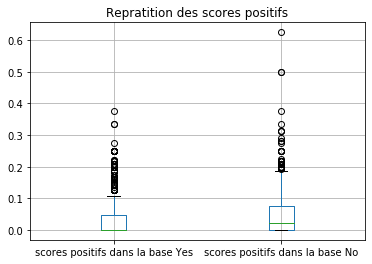

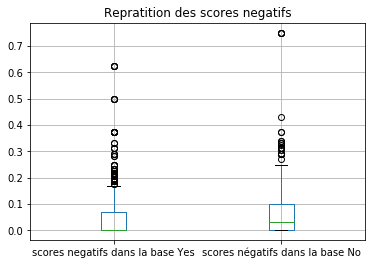

In [57]:
# Boxplot des distributions des scores 

# Scores positifs des bases No et Yes  
lis_pos_no=pd.DataFrame(list(Base_SWN_no.Scores),columns=['score_pos','score_neg','score_neutre'])['score_pos']
lis_pos_yes=pd.DataFrame(list(Base_SWN_yes.Scores),columns=['score_pos','score_neg','score_neutre'])['score_pos']

# Scores positifs des bases No et Yes  
lis_neg_no=pd.DataFrame(list(Base_SWN_no.Scores),columns=['score_pos','score_neg','score_neutre'])['score_neg']
lis_neg_yes=pd.DataFrame(list(Base_SWN_yes.Scores),columns=['score_pos','score_neg','score_neutre'])['score_neg']


Base_pos=pd.DataFrame([[x,y] for (x,y) in zip(lis_pos_yes,lis_pos_no)],columns=['scores positifs dans la base Yes','scores positifs dans la base No'])
Base_neg=pd.DataFrame([[x,y] for (x,y) in zip(lis_neg_yes,lis_neg_no)],columns=['scores negatifs dans la base Yes','scores négatifs dans la base No']) 

x=Base_pos.plot.box(grid='True',title='Repratition des scores positifs')
x=Base_neg.plot.box(grid='True',title='Repratition des scores negatifs')

$\underline{Commentaires}$

Concernant les scores positifs, la distribution de ces scores est sensiblement la même pour la base Yes et pour la base No.

Concernant les scors négatifs, la distribution présente des différences. On observe que les tweets dans la base No sont scorés plus négativement. Par exemple, le 3ème quartile est des scores négatifs est de 0.10 pour la base No ; de 0.075 pourla base Yes. En observant les boxplots de ces distributions, on observe que la différence est assez significative. 

On peut faire la même remarque pour les scores positifs.

S'ajoutant aux arguments différents entre les tweets No et Yes (voir partie II.a, II.b), la tonalité nous informe du caractère pessimiste/optimiste des tweets. Les personnes sceptiques semblent avoir un ton davantage incisif. C'est intéressant dans le sens où le 'pessimisme' supposé des tweets Yes (concernant le réchauffement climatique, hausse de température...) semble être dépassé par la 'négativité' tweets No(concernant les fraudes, les scandales, les mensonges). On peut notamment expliqué cela par le fait que les tweet No sont souvents accompagnés de mots plus forts et, à certains moments, d'insultes. 

Pour résumer les trois scores associés à un tweet, on peut déterminer si le score positif est supèrieur au score négatif. 

In [58]:
# On peut scorer un Tweet en faisant le classant positif si son score négatif est plus grand
# que son score négatif ; et inversement. Si les deux scores sont égaux on le classe comme neutre

def stati_scores_major(base):
    base=pd.DataFrame(list(base.Scores),columns=['score_pos','score_neg','score_neutre'])
    base['pos']=(base['score_pos']>base['score_neg'])*1
    base['neg']=(base['score_neg']>base['score_pos'])*1
    return([sum(base['pos']),sum(base['neg']),len(base)-(sum(base['neg'])+sum(base['pos']))])

# Sur toute la base 
data=Base_SWN[Base_SWN.Scores!='pas de mots connus par SWN']
results=stati_scores_major(data)
print(' ')
print('Sur toute la base ({} tweets) : '.format(len(data)))
print(' ')
print('Le nombre de tweets jugés positifs est {} --> {}%'.format(str(results[0]),str(round(100*results[0]/len(data),2))))
print('Le nombre de tweets jugés négatifs est {} --> {}%'.format(str(results[1]),str(round(100*results[1]/len(data),2))))
print('Le nombre de tweets jugés neutres est {} --> {}%'.format(str(results[2]),str(round(100*results[2]/len(data),2))))
print(' ')
print('#'*30)
print('#'*30)
print(' ')

# Sur la bases composée des Yes  
data=Base_SWN_yes
results=stati_scores_major(data)
print(' ')
print('Sur la base composée des Yes ({} tweets) : '.format(len(data)))
print(' ')
print('Le nombre de tweets jugés positifs est {} --> {}%'.format(str(results[0]),str(round(100*results[0]/len(data),2))))
print('Le nombre de tweets jugés négatifs est {} --> {}%'.format(str(results[1]),str(round(100*results[1]/len(data),2))))
print('Le nombre de tweets jugés neutres est {} --> {}%'.format(str(results[2]),str(round(100*results[2]/len(data),2))))
print(' ')
print('#'*30)
print('#'*30)
print(' ')

# Sur la bases composée des No 
data=Base_SWN_no
results=stati_scores_major(data)
print(' ')
print('Sur la base composée des No ({} tweets) : '.format(len(data)))
print(' ')
print('Le nombre de tweets jugés positifs est {} --> {}%'.format(str(results[0]),str(round(100*results[0]/len(data),2))))
print('Le nombre de tweets jugés négatifs est {} --> {}%'.format(str(results[1]),str(round(100*results[1]/len(data),2))))
print('Le nombre de tweets jugés neutres est {} --> {}%'.format(str(results[2]),str(round(100*results[2]/len(data),2))))
print(' ')
print('#'*30)
print('#'*30)
print(' ')


 
Sur toute la base (5435 tweets) : 
 
Le nombre de tweets jugés positifs est 1452 --> 26.72%
Le nombre de tweets jugés négatifs est 1837 --> 33.8%
Le nombre de tweets jugés neutres est 2146 --> 39.48%
 
##############################
##############################
 
 
Sur la base composée des Yes (2779 tweets) : 
 
Le nombre de tweets jugés positifs est 740 --> 26.63%
Le nombre de tweets jugés négatifs est 939 --> 33.79%
Le nombre de tweets jugés neutres est 1100 --> 39.58%
 
##############################
##############################
 
 
Sur la base composée des No (1014 tweets) : 
 
Le nombre de tweets jugés positifs est 297 --> 29.29%
Le nombre de tweets jugés négatifs est 406 --> 40.04%
Le nombre de tweets jugés neutres est 311 --> 30.67%
 
##############################
##############################
 


$\underline{Commentaires}$

On observe que les tweets sont majoritarement à tonalité négative, qu'ils soient de la base Yes ou No. Néanmmoins, le pessimisme ou l'optimisme est davantage marqué chez les tweets des personnes sceptiques. Par exemple, les tweets scorés négatifs représent $40.04%$% de la base des No contre $533.79%$% pour les tweets Yes. On retrouve le caractère demonstratif des personnes climato-sceptiques.

A titre d'exemples, voici les 5 tweets jugés le plus 'négativement' dans le base de No' :

In [59]:
def stati_scores_tweets(base):
    base_1=base.copy()
    base=pd.DataFrame(list(base.Scores),columns=['score_pos','score_neg','score_neutre'])
    base['Tweet']=base_1.Tweet
    return(base)

# Print des premiers tweets
data=Base_SWN_no.reset_index()
data=stati_scores_tweets(data)
data=data.sort_values(by=['score_neg'],ascending=False).reset_index()
print(' ')
print(data.Tweet[4])
print('score négatif : {}'.format(str(data.score_neg[4])))
print(' ')
print(data.Tweet[7])
print('score négatif : {}'.format(str(data.score_neg[7])))
print(' ')

 
If Ensler & Behar represent liberal women, that's such a sad pathetic stmt. Global warming fanatics who yack about their vaginas. Pathetic!
score négatif : 0.42857142857142855
 
RT @gopevangelist: Global warming hysteria presumes 3 things: 1 it exists, 2 it is man-made, 3 it is bad. All 3 must be true. This winter may prove all 3 false
score négatif : 0.3392857142857143
 


In [61]:
# Cosinus similarité

def closest_to(word,n_top_similar):
    print('Les {} mots les plus proches de {} sont : '.format(n_top_similar,word))
    print(' ')
    for word in [w[0] for w in model_wv.most_similar(word,topn=n_top_similar)]:
        print(word)
        
closest_to('change',10)
print(' ')
print('#'*50)
print(' ')

closest_to('climate',10)

Les 10 mots les plus proches de change sont : 
 
ocean_chemistry
always
good_thing
a
our
won
800,000
an
evidence
map
 
##################################################
 
Les 10 mots les plus proches de climate sont : 
 
landmark
report
environment
news
conduct
defends_conclusion
panel
before_summit
science
on
